In [1]:
setwd('/import/DB/zhang//data2/')

In [75]:
getwd()

[1] "/import/DB/zhang/data2"

In [76]:
library(Seurat)

In [78]:
dir='.' 
samples=list.files( dir )
samples

[1] "BC10" "BC11" "BC16" "BC17" "BC2"  "BC20" "BC21" "BC22" "BC3"  "BC5" 
[11] "BC6"  "OS_1" "OS_2" "OS_3" "OS_4" "OS_5" "OS_6"

In [80]:
sceList = lapply(samples,function(pro){ 
 #pro=samples[1]
 folder=file.path(dir ,pro ) 
 print(pro)
 print(folder)
 print(list.files(folder))
 sce=CreateSeuratObject(counts = Read10X(paste0(folder)),
 project = pro )

 return(sce)
})

[1] "BC10"
[1] "./BC10"
[1] "barcodes.tsv.gz" "features.tsv"    "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC11"
[1] "./BC11"
[1] "barcodes.tsv.gz" "features.tsv"    "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC16"
[1] "./BC16"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC17"
[1] "./BC17"
[1] "barcodes.tsv"    "barcodes.tsv.gz" "features.tsv"    "features.tsv.gz"
[5] "matrix.mtx.gz"  
[1] "BC2"
[1] "./BC2"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC20"
[1] "./BC20"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC21"
[1] "./BC21"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC22"
[1] "./BC22"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC3"
[1] "./BC3"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC5"
[1] "./BC5"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "BC6"
[1] "./BC6"
[1] "barcodes.tsv.gz" "features.tsv.gz" "matrix.mtx.gz"  
[1] "OS_1"
[1] "./OS_1"
[1] "b

In [81]:
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])

Warning message in CheckDuplicateCellNames(object.list = objects):
"Some cell names are duplicated across objects provided. Renaming to enforce unique cell names."


In [82]:
single.ob

An object of class Seurat 
33715 features across 183250 samples within 1 assay 
Active assay: RNA (33715 features, 0 variable features)

In [83]:
immune.combined = single.ob

In [84]:
immune.combined[["percent.mt"]] <- PercentageFeatureSet(immune.combined,pattern = "^MT-")

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



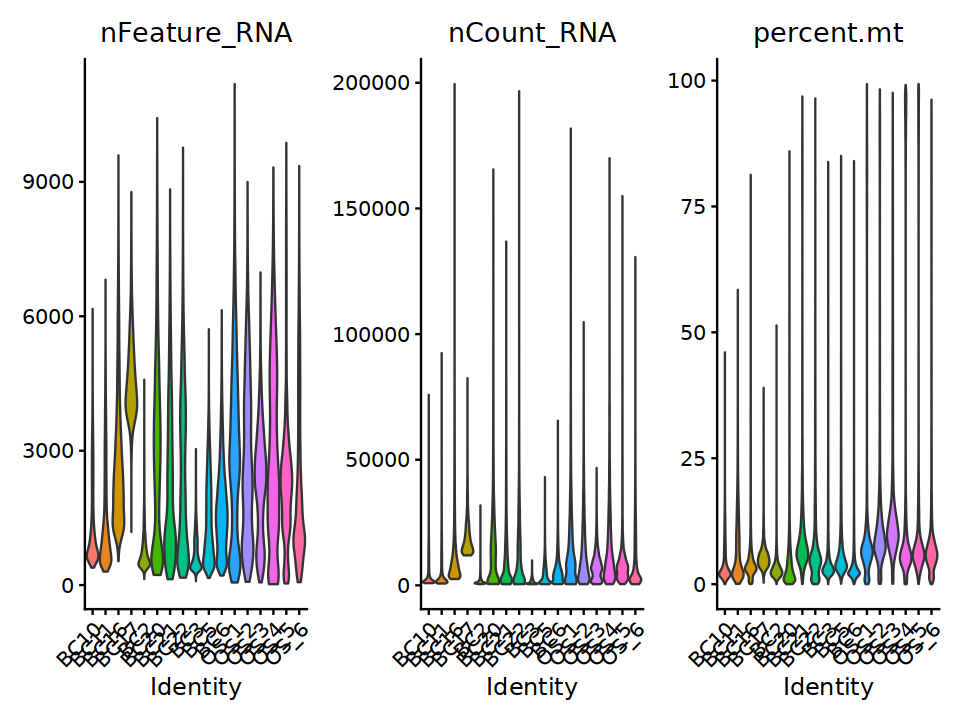

In [85]:
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

In [86]:
library(ggplot2)

In [87]:
ggsave('figure1.pdf',height =  4,width = 9)

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



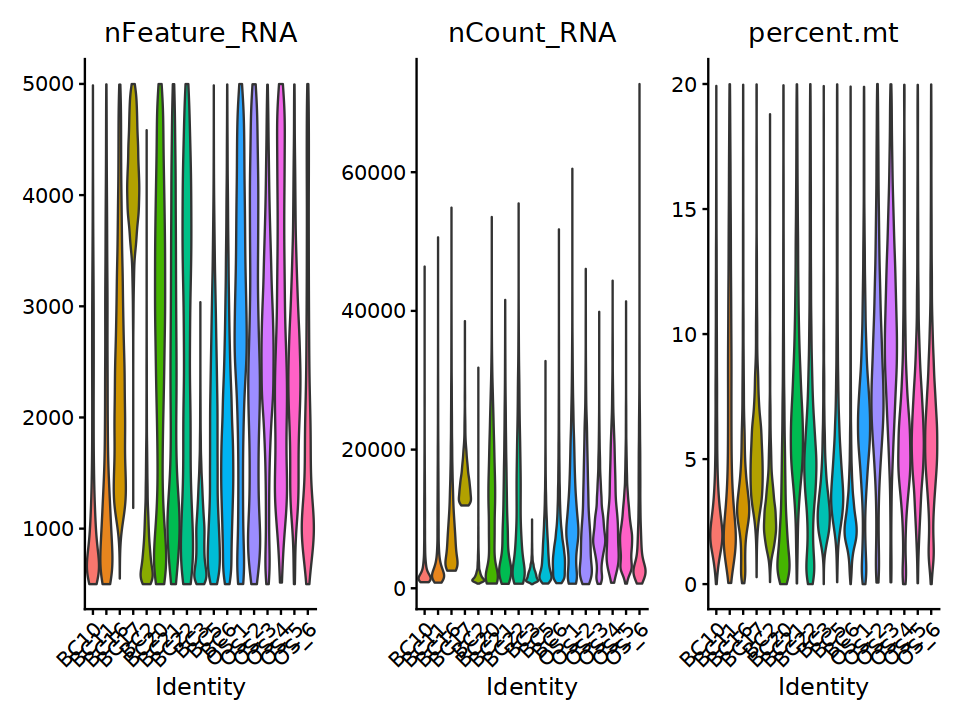

In [88]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 20)

VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")

ggsave('figure1-1.pdf',height =  4,width = 9)

In [89]:
table(immune.combined$orig.ident)


 BC10  BC11  BC16  BC17   BC2  BC20  BC21  BC22   BC3   BC5   BC6  OS_1  OS_2 
16996 11081  8765  2837  4118  7819  4817  6575  5140 17881 19408  5922  5899 
 OS_3  OS_4  OS_5  OS_6 
 7597  3088  8771  7150 

In [90]:
immune.combined$group = ifelse(immune.combined$orig.ident %in% c('OS_1','OS_2','OS_3','OS_4','OS_5','OS_6'),'no','yes')

In [91]:
Idents(immune.combined) = 'group'

In [93]:
DefaultAssay(immune.combined) = 'RNA'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


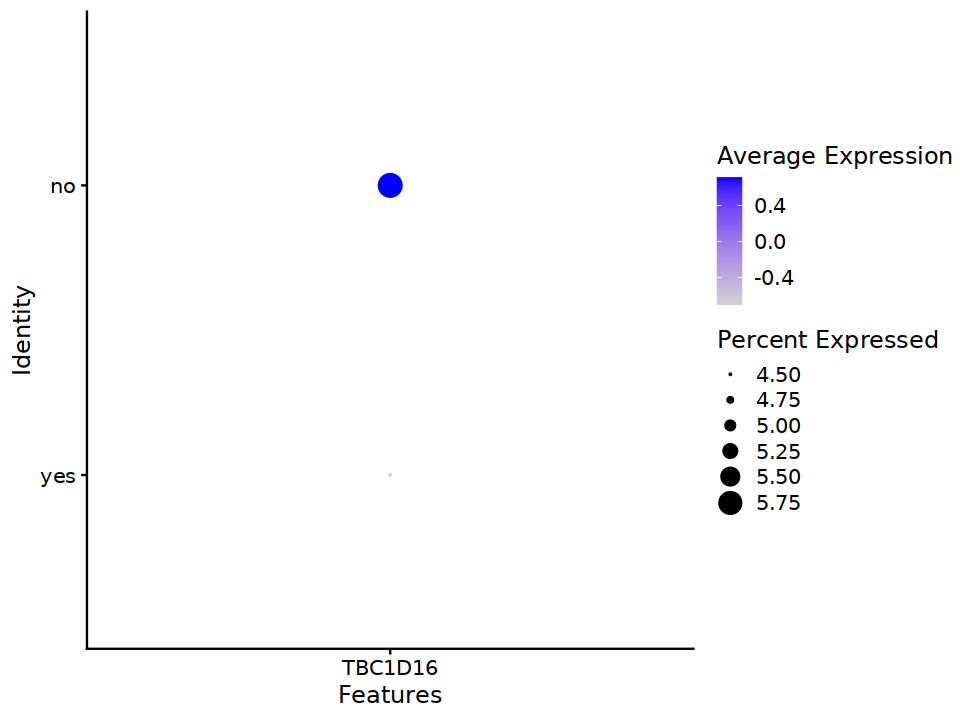

In [95]:
DotPlot(immune.combined,features = 'TBC1D16')

### 去除双细胞

In [96]:
library(DoubletFinder)
library(tidyverse)
library(Seurat)
library(patchwork)

In [97]:
immune.combined <-NormalizeData(immune.combined)
immune.combined <- ScaleData(immune.combined,feature=rownames(immune.combined), verbose = FALSE)
immune.combined <- FindVariableFeatures(object = immune.combined,selection.method = 'vst', nfeatures = 2000)
immune.combined <- RunPCA(immune.combined,  features = VariableFeatures(object = immune.combined) ,verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- RunTSNE(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:20)
immune.combined <- FindClusters(immune.combined)

14:16:27 UMAP embedding parameters a = 0.9922 b = 1.112

14:16:28 Read 143864 rows and found 20 numeric columns

14:16:28 Using Annoy for neighbor search, n_neighbors = 30

14:16:28 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:16:47 Writing NN index file to temp file /tmp/RtmpibhLQ0/file3478aa24247f

14:16:47 Searching Annoy index using 1 thread, search_k = 3000

14:17:36 Annoy recall = 100%

14:17:37 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

14:17:42 Initializing from normalized Laplacian + noise (using irlba)

14:18:16 Commencing optimization for 200 epochs, with 6479814 positive edges

14:20:52 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 143864
Number of edges: 4973586

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9491
Number of communities: 47
Elapsed time: 132 seconds


In [98]:
H9 = immune.combined

In [99]:
paramSweep = function (seu, PCs = 1:20, sct = FALSE, num.cores = 1) 
{
    require(Seurat)
    require(fields)
    require(parallel)
    pK <- c(5e-04, 0.001, 0.005, seq(0.01, 0.3, by = 0.01))
    pN <- seq(0.05, 0.3, by = 0.05)
    min.cells <- round(nrow(seu@meta.data)/(1 - 0.05) - nrow(seu@meta.data))
    pK.test <- round(pK * min.cells)
    pK <- pK[which(pK.test >= 1)]
    orig.commands <- seu@commands
    if (nrow(seu@meta.data) > 10000) {
        real.cells <- rownames(seu@meta.data)[sample(1:nrow(seu@meta.data), 
            10000, replace = FALSE)]
        data <- seu@assays$RNA@counts[, real.cells]
        n.real.cells <- ncol(data)
    }
    if (nrow(seu@meta.data) <= 10000) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts
        n.real.cells <- ncol(data)
    }
    if (num.cores > 1) {
        require(parallel)
        cl <- makeCluster(num.cores)
        output2 <- mclapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct, mc.cores = num.cores)
        stopCluster(cl)
    }
    else {
        output2 <- lapply(as.list(1:length(pN)), FUN = parallel_paramSweep, 
            n.real.cells, real.cells, pK, pN, data, orig.commands, 
            PCs, sct)
    }
    sweep.res.list <- list()
    list.ind <- 0
    for (i in 1:length(output2)) {
        for (j in 1:length(output2[[i]])) {
            list.ind <- list.ind + 1
            sweep.res.list[[list.ind]] <- output2[[i]][[j]]
        }
    }
    name.vec <- NULL
    for (j in 1:length(pN)) {
        name.vec <- c(name.vec, paste("pN", pN[j], "pK", pK, 
            sep = "_"))
    }
    names(sweep.res.list) <- name.vec
    return(sweep.res.list)
}

In [100]:
sweep.res.list_kidney <- paramSweep(H9, PCs = 1:20, sct = FALSE)

[1] "Creating artificial doublets for pN = 5%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 10%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 15%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 20%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 25%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."
[1] "Creating artificial doublets for pN = 30%"
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Defining neighborhoods..."
[1] "Computing pANN across all pK..."
[1] "pK = 5e-04..."
[1] "pK = 0.001..."
[1] "pK = 0.005..."
[1] "pK = 0.01..."
[1] "pK = 0.02..."
[1] "pK = 0.03..."
[1] "pK = 0.04..."
[1] "pK = 0.05..."
[1] "pK = 0.06..."
[1] "pK = 0.07..."
[1] "pK = 0.08..."
[1] "pK = 0.09..."
[1] "pK = 0.1..."
[1] "pK = 0.11..."
[1] "pK = 0.12..."
[1] "pK = 0.13..."
[1] "pK = 0.14..."
[1] "pK = 0.15..."
[1] "pK = 0.16..."
[1] "pK = 0.17..."
[1] "pK = 0.18..."
[1] "pK = 0.19..."
[1] "pK = 0.2..."
[1] "pK = 0.21..."
[1] "pK = 0.22..."
[1] "pK = 0.23..."
[1] "pK = 0.24..."
[1] "pK = 0.25..."
[1] "pK = 0.26..."
[1] "pK = 0.27..."
[1] "pK = 0.28..."
[1] "pK = 0.29..."
[1] "pK = 0.3..."


NULL


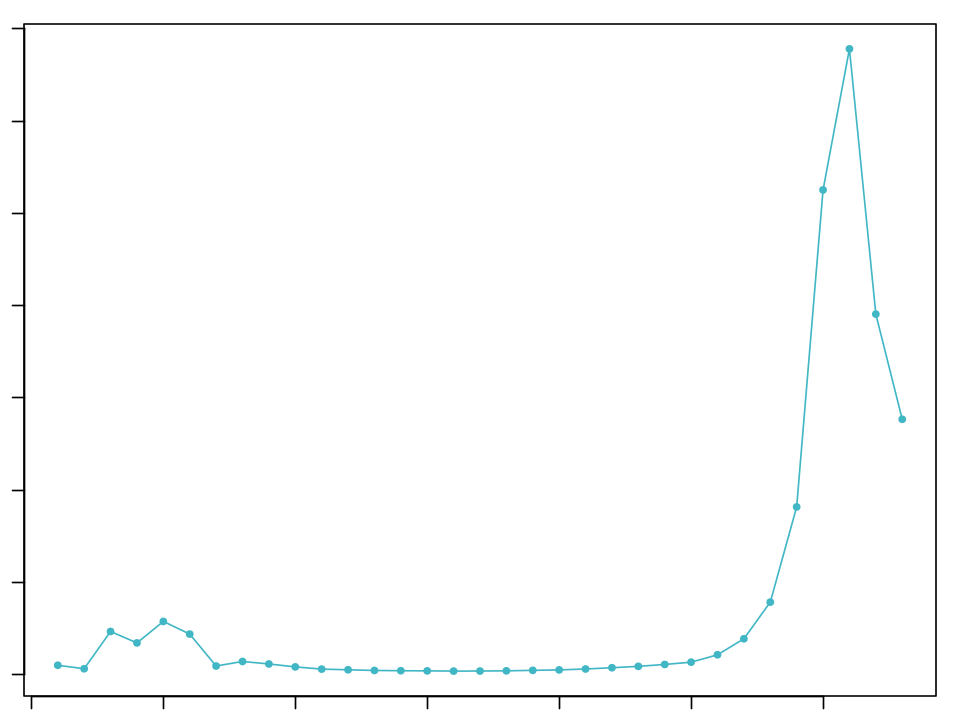

In [101]:
sweep.stats_kidney <- summarizeSweep(sweep.res.list_kidney, GT = FALSE)
bcmvn_kidney <- find.pK(sweep.stats_kidney)

In [102]:
pK_bcmvn <- bcmvn_kidney$pK[which.max(bcmvn_kidney$BCmetric)] %>% as.character() %>% as.numeric()

In [103]:
DoubletRate = ncol(H9)*8*1e-7

In [104]:
DoubletRate

[1] 0.1150912

In [105]:
homotypic.prop <- modelHomotypic(H9$orig.ident)

In [106]:
nExp_poi <- round(DoubletRate*ncol(H9)) 
nExp_poi.adj <- round(nExp_poi*(1-homotypic.prop))

In [107]:
doubletFinder = function (seu, PCs, pN = 0.25, pK, nExp, reuse.pANN = FALSE, 
    sct = FALSE, annotations = NULL) 
{
    require(Seurat)
    require(fields)
    require(KernSmooth)
    if (reuse.pANN != FALSE) {
        pANN.old <- seu@meta.data[, reuse.pANN]
        classifications <- rep("Singlet", length(pANN.old))
        classifications[order(pANN.old, decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        return(seu)
    }
    if (reuse.pANN == FALSE) {
        real.cells <- rownames(seu@meta.data)
        data <- seu@assays$RNA@counts[, real.cells]
        n_real.cells <- length(real.cells)
        n_doublets <- round(n_real.cells/(1 - pN) - n_real.cells)
        print(paste("Creating", n_doublets, "artificial doublets...", 
            sep = " "))
        real.cells1 <- sample(real.cells, n_doublets, replace = TRUE)
        real.cells2 <- sample(real.cells, n_doublets, replace = TRUE)
        doublets <- (data[, real.cells1] + data[, real.cells2])/2
        colnames(doublets) <- paste("X", 1:n_doublets, sep = "")
        data_wdoublets <- cbind(data, doublets)
        if (!is.null(annotations)) {
            stopifnot(typeof(annotations) == "character")
            stopifnot(length(annotations) == length(Cells(seu)))
            stopifnot(!any(is.na(annotations)))
            annotations <- factor(annotations)
            names(annotations) <- Cells(seu)
            doublet_types1 <- annotations[real.cells1]
            doublet_types2 <- annotations[real.cells2]
        }
        orig.commands <- seu@commands
        if (sct == FALSE) {
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Normalizing Seurat object...")
            seu_wdoublets <- NormalizeData(seu_wdoublets, normalization.method = orig.commands$NormalizeData.RNA@params$normalization.method, 
                scale.factor = orig.commands$NormalizeData.RNA@params$scale.factor, 
                margin = orig.commands$NormalizeData.RNA@params$margin)
            print("Finding variable genes...")
            seu_wdoublets <- FindVariableFeatures(seu_wdoublets, 
                selection.method = orig.commands$FindVariableFeatures.RNA$selection.method, 
                loess.span = orig.commands$FindVariableFeatures.RNA$loess.span, 
                clip.max = orig.commands$FindVariableFeatures.RNA$clip.max, 
                mean.function = orig.commands$FindVariableFeatures.RNA$mean.function, 
                dispersion.function = orig.commands$FindVariableFeatures.RNA$dispersion.function, 
                num.bin = orig.commands$FindVariableFeatures.RNA$num.bin, 
                binning.method = orig.commands$FindVariableFeatures.RNA$binning.method, 
                nfeatures = orig.commands$FindVariableFeatures.RNA$nfeatures, 
                mean.cutoff = orig.commands$FindVariableFeatures.RNA$mean.cutoff, 
                dispersion.cutoff = orig.commands$FindVariableFeatures.RNA$dispersion.cutoff)
            print("Scaling data...")
            seu_wdoublets <- ScaleData(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                model.use = orig.commands$ScaleData.RNA$model.use, 
                do.scale = orig.commands$ScaleData.RNA$do.scale, 
                do.center = orig.commands$ScaleData.RNA$do.center, 
                scale.max = orig.commands$ScaleData.RNA$scale.max, 
                block.size = orig.commands$ScaleData.RNA$block.size, 
                min.cells.to.block = orig.commands$ScaleData.RNA$min.cells.to.block)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, features = orig.commands$ScaleData.RNA$features, 
                npcs = length(PCs), rev.pca = orig.commands$RunPCA.RNA$rev.pca, 
                weight.by.var = orig.commands$RunPCA.RNA$weight.by.var, 
                verbose = FALSE)
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        if (sct == TRUE) {
            require(sctransform)
            print("Creating Seurat object...")
            seu_wdoublets <- CreateSeuratObject(counts = data_wdoublets)
            print("Running SCTransform...")
            seu_wdoublets <- SCTransform(seu_wdoublets)
            print("Running PCA...")
            seu_wdoublets <- RunPCA(seu_wdoublets, npcs = length(PCs))
            pca.coord <- seu_wdoublets@reductions$pca@cell.embeddings[, 
                PCs]
            cell.names <- rownames(seu_wdoublets@meta.data)
            nCells <- length(cell.names)
            rm(seu_wdoublets)
            gc()
        }
        print("Calculating PC distance matrix...")
        dist.mat <- fields::rdist(pca.coord)
        print("Computing pANN...")
        pANN <- as.data.frame(matrix(0L, nrow = n_real.cells, 
            ncol = 1))
        if (!is.null(annotations)) {
            neighbor_types <- as.data.frame(matrix(0L, nrow = n_real.cells, 
                ncol = length(levels(doublet_types1))))
        }
        rownames(pANN) <- real.cells
        colnames(pANN) <- "pANN"
        k <- round(nCells * pK)
        for (i in 1:n_real.cells) {
            neighbors <- order(dist.mat[, i])
            neighbors <- neighbors[2:(k + 1)]
            pANN$pANN[i] <- length(which(neighbors > n_real.cells))/k
            if (!is.null(annotations)) {
                for (ct in unique(annotations)) {
                  neighbors_that_are_doublets = neighbors[neighbors > 
                    n_real.cells]
                  if (length(neighbors_that_are_doublets) > 0) {
                    neighbor_types[i, ] <- table(doublet_types1[neighbors_that_are_doublets - 
                      n_real.cells]) + table(doublet_types2[neighbors_that_are_doublets - 
                      n_real.cells])
                    neighbor_types[i, ] <- neighbor_types[i, 
                      ]/sum(neighbor_types[i, ])
                  }
                  else {
                    neighbor_types[i, ] <- NA
                  }
                }
            }
        }
        print("Classifying doublets..")
        classifications <- rep("Singlet", n_real.cells)
        classifications[order(pANN$pANN[1:n_real.cells], decreasing = TRUE)[1:nExp]] <- "Doublet"
        seu@meta.data[, paste("pANN", pN, pK, nExp, sep = "_")] <- pANN[rownames(seu@meta.data), 
            1]
        seu@meta.data[, paste("DF.classifications", pN, pK, nExp, 
            sep = "_")] <- classifications
        if (!is.null(annotations)) {
            colnames(neighbor_types) = levels(doublet_types1)
            for (ct in levels(doublet_types1)) {
                seu@meta.data[, paste("DF.doublet.contributors", 
                  pN, pK, nExp, ct, sep = "_")] <- neighbor_types[, 
                  ct]
            }
        }
        return(seu)
    }
}

In [109]:
scRNA <- doubletFinder(H9, PCs = 1:20, pN = 0.25, pK = pK_bcmvn, 
                          nExp = nExp_poi.adj, reuse.pANN = F, sct = F)

[1] "Creating 47955 artificial doublets..."
[1] "Creating Seurat object..."
[1] "Normalizing Seurat object..."
[1] "Finding variable genes..."
[1] "Scaling data..."


Centering and scaling data matrix



[1] "Running PCA..."
[1] "Calculating PC distance matrix..."
[1] "Computing pANN..."
[1] "Classifying doublets.."


In [110]:
colnames(scRNA@meta.data)

[1] "orig.ident"                         "nCount_RNA"                        
[3] "nFeature_RNA"                       "percent.mt"                        
[5] "group"                              "RNA_snn_res.0.8"                   
[7] "seurat_clusters"                    "pANN_0.25_0.28_15254"              
[9] "DF.classifications_0.25_0.28_15254"

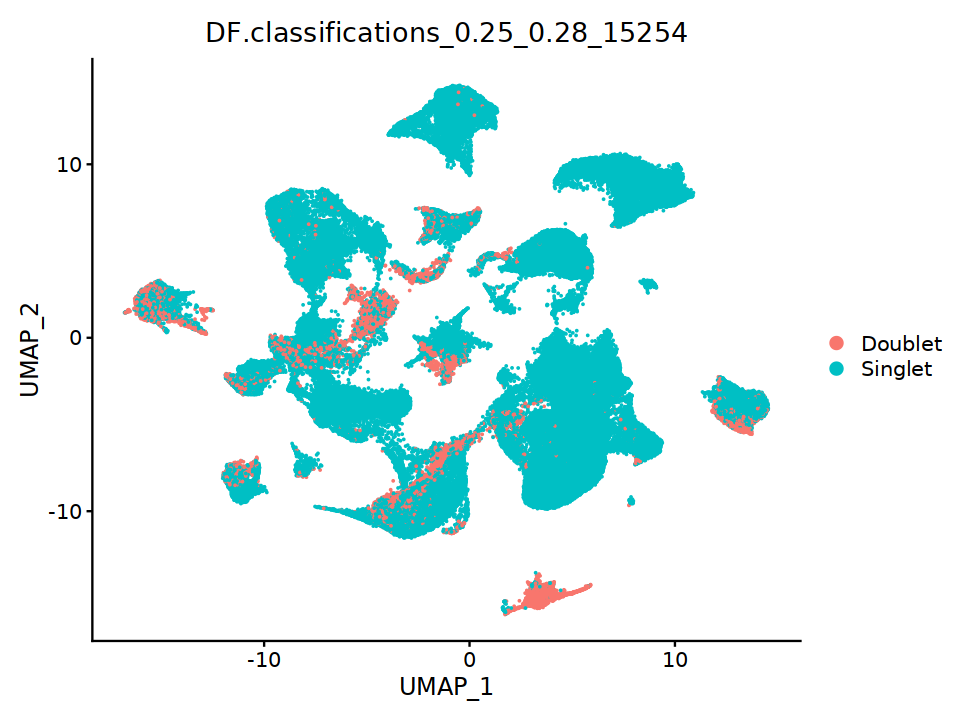

In [112]:
DimPlot(scRNA, reduction = "umap", group.by = "DF.classifications_0.25_0.28_15254",raster=FALSE)

In [113]:
ggsave('figure2.pdf',height =  4,width = 5)

In [114]:
immune.combined = subset(scRNA, subset = DF.classifications_0.25_0.28_15254  != 'Doublet')

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`

Rasterizing points since number of points exceeds 100,000.
To disable this behavior set `raster=FALSE`



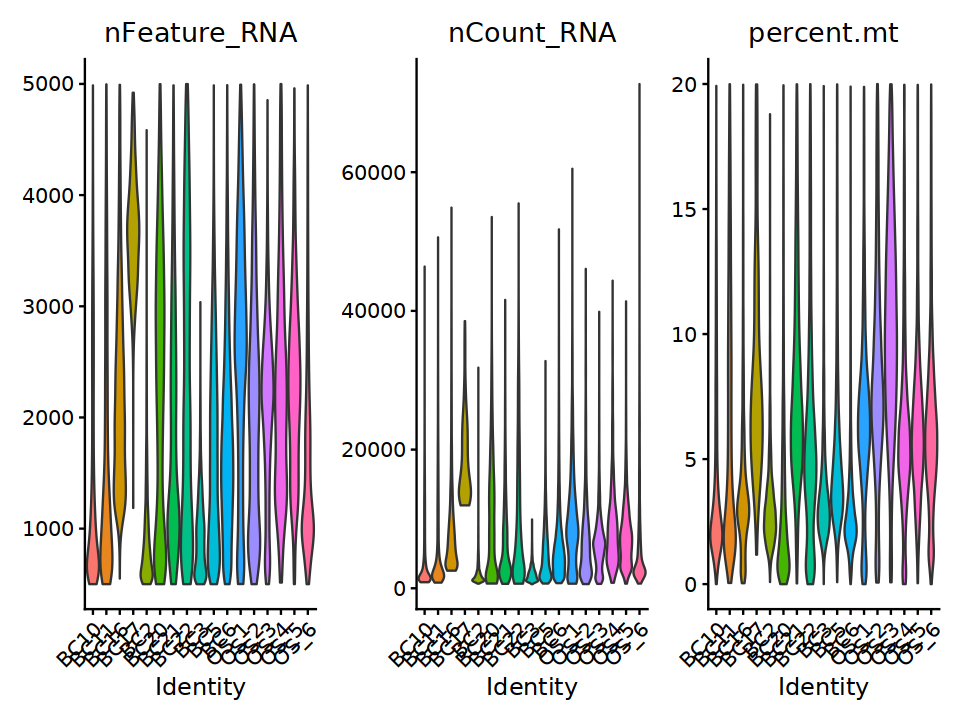

In [115]:
immune.combined <-   subset(immune.combined, subset = nFeature_RNA > 500 & nFeature_RNA < 5000 & percent.mt < 20)
VlnPlot(immune.combined, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3,pt.size = 0,group.by="orig.ident")
ggsave('figure1-1.pdf',height =  4,width = 9)

In [116]:
table(immune.combined$orig.ident)


 BC10  BC11  BC16  BC17   BC2  BC20  BC21  BC22   BC3   BC5   BC6  OS_1  OS_2 
16993 11027  7467   343  4103  6277  3975  5681  5139 17651 19018  5055  4402 
 OS_3  OS_4  OS_5  OS_6 
 4595  2423  8467  5994 

In [117]:
saveRDS(immune.combined,file = 'immune.combined.rds')

In [ ]:
# ifnb.list <- SplitObject(immune.combined, split.by = "orig.ident")

# testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
# testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)

# DefaultAssay(testAB.integrated) <- "integrated"
# # Run the standard workflow for visualization and clustering
# testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
# testAB.integrated <- RunPCA(testAB.integrated, npcs = 50, verbose = FALSE)
# testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:30)
# testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.5)
# testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:30)
# testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:30)

# immune.combined = testAB.integrated

In [118]:
options(repr.plot.width = 18,repr.plot.height = 9 )

In [49]:
#DimPlot(scRNA, reduction = "umap", split.by = "orig.ident",ncol = 4)

In [119]:
library(harmony)

In [120]:
DefaultAssay(immune.combined) = 'RNA'

In [121]:
sceList <- SplitObject(immune.combined, split.by = "orig.ident")

In [122]:
single.ob=merge(sceList[[1]],sceList[2:length(sceList)])

In [123]:
DefaultAssay(single.ob) = 'RNA'

In [124]:
scRNA_harmony = single.ob

In [125]:
scRNA_harmony <- NormalizeData(scRNA_harmony) %>% FindVariableFeatures() %>% ScaleData() %>% RunPCA(verbose=FALSE)
##整合
system.time({scRNA_harmony <- RunHarmony(scRNA_harmony, group.by.vars = "orig.ident")})

Centering and scaling data matrix

Transposing data matrix

Initializing state using k-means centroids initialization

Warning message:
"did not converge in 25 iterations"
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony converged after 5 iterations

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity"


   user  system elapsed 
116.545  19.121 106.672 

In [126]:
scRNA_harmony <- RunUMAP(scRNA_harmony, reduction = "harmony", dims = 1:20)

01:28:52 UMAP embedding parameters a = 0.9922 b = 1.112

01:28:52 Read 128610 rows and found 20 numeric columns

01:28:52 Using Annoy for neighbor search, n_neighbors = 30

01:28:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

01:29:06 Writing NN index file to temp file /tmp/RtmpibhLQ0/file3478a3b4b3708

01:29:06 Searching Annoy index using 1 thread, search_k = 3000

01:29:55 Annoy recall = 100%

01:29:56 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

01:30:01 Initializing from normalized Laplacian + noise (using irlba)

01:30:29 Commencing optimization for 200 epochs, with 5905148 positive edges

01:32:52 Optimization finished



In [127]:
scRNA_harmony <- FindNeighbors(scRNA_harmony, reduction = "harmony", dims = 1:20) %>% FindClusters(resolution =  0.3)
##作图
#group_by_cluster

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 128610
Number of edges: 3985630

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9467
Number of communities: 18
Elapsed time: 158 seconds


In [128]:
options(repr.plot.width = 12,repr.plot.height = 8)

In [129]:
table(scRNA_harmony$orig.ident)


 BC10  BC11  BC16  BC17   BC2  BC20  BC21  BC22   BC3   BC5   BC6  OS_1  OS_2 
16993 11027  7467   343  4103  6277  3975  5681  5139 17651 19018  5055  4402 
 OS_3  OS_4  OS_5  OS_6 
 4595  2423  8467  5994 

In [133]:
scRNA_harmony$group = ifelse(scRNA_harmony$orig.ident %in% c('OS_1','OS_2','OS_3','OS_4','OS_5','OS_6'),'no','yes')

In [145]:
options(repr.plot.height = 12)

In [158]:
Idents(scRNA_harmony) = 'seurat_clusters'

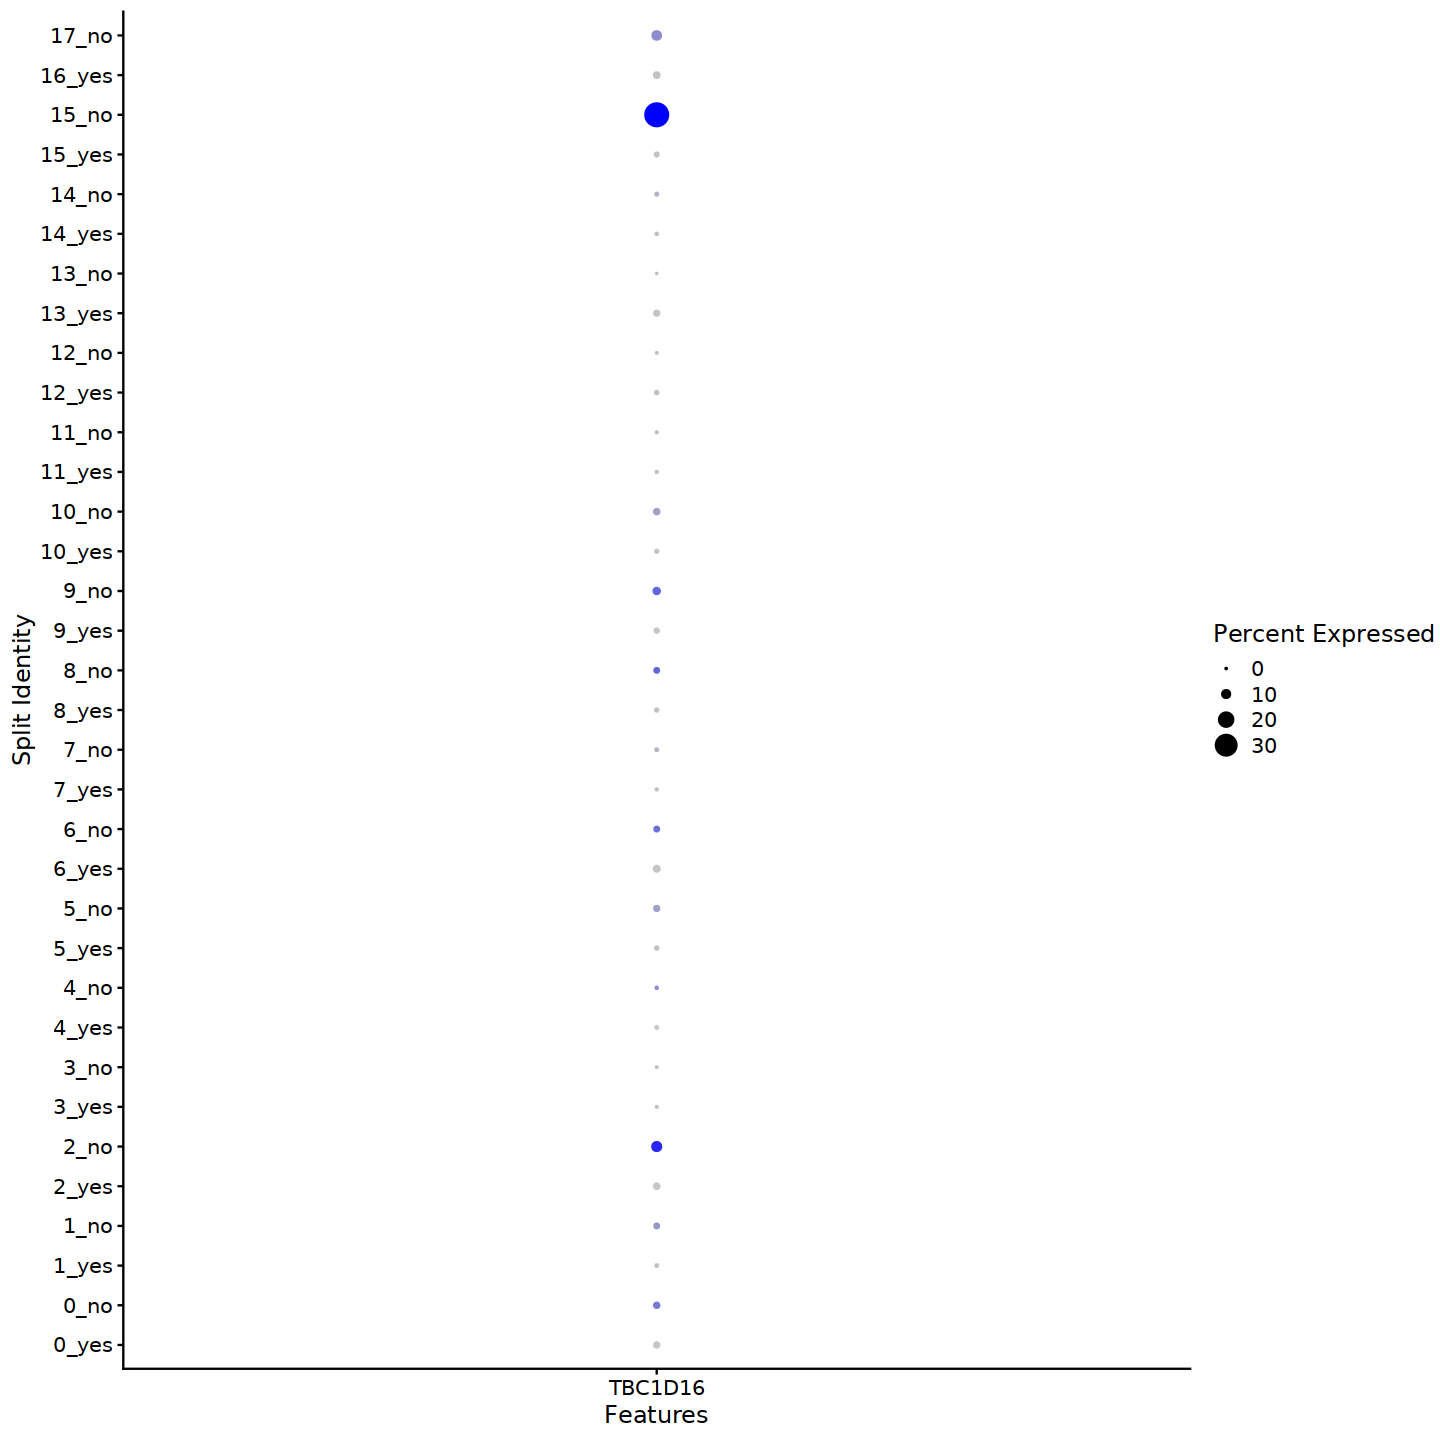

In [159]:
DotPlot(scRNA_harmony,split.by = "group",features = 'TBC1D16')

In [160]:
table(scRNA_harmony$seurat_clusters,scRNA_harmony$group)

    
        no   yes
  0   3570 28879
  1  11331 14390
  2    784 12148
  3   5445  4967
  4   1035  8578
  5   1632  7490
  6    831  7408
  7   2760  3501
  8    341  3385
  9    406  2875
  10   871  1292
  11  1277   369
  12   335  1143
  13     9   711
  14   266   148
  15     6   265
  16     0   125
  17    37     0

In [151]:
DefaultAssay(scRNA_harmony) = 'RNA'

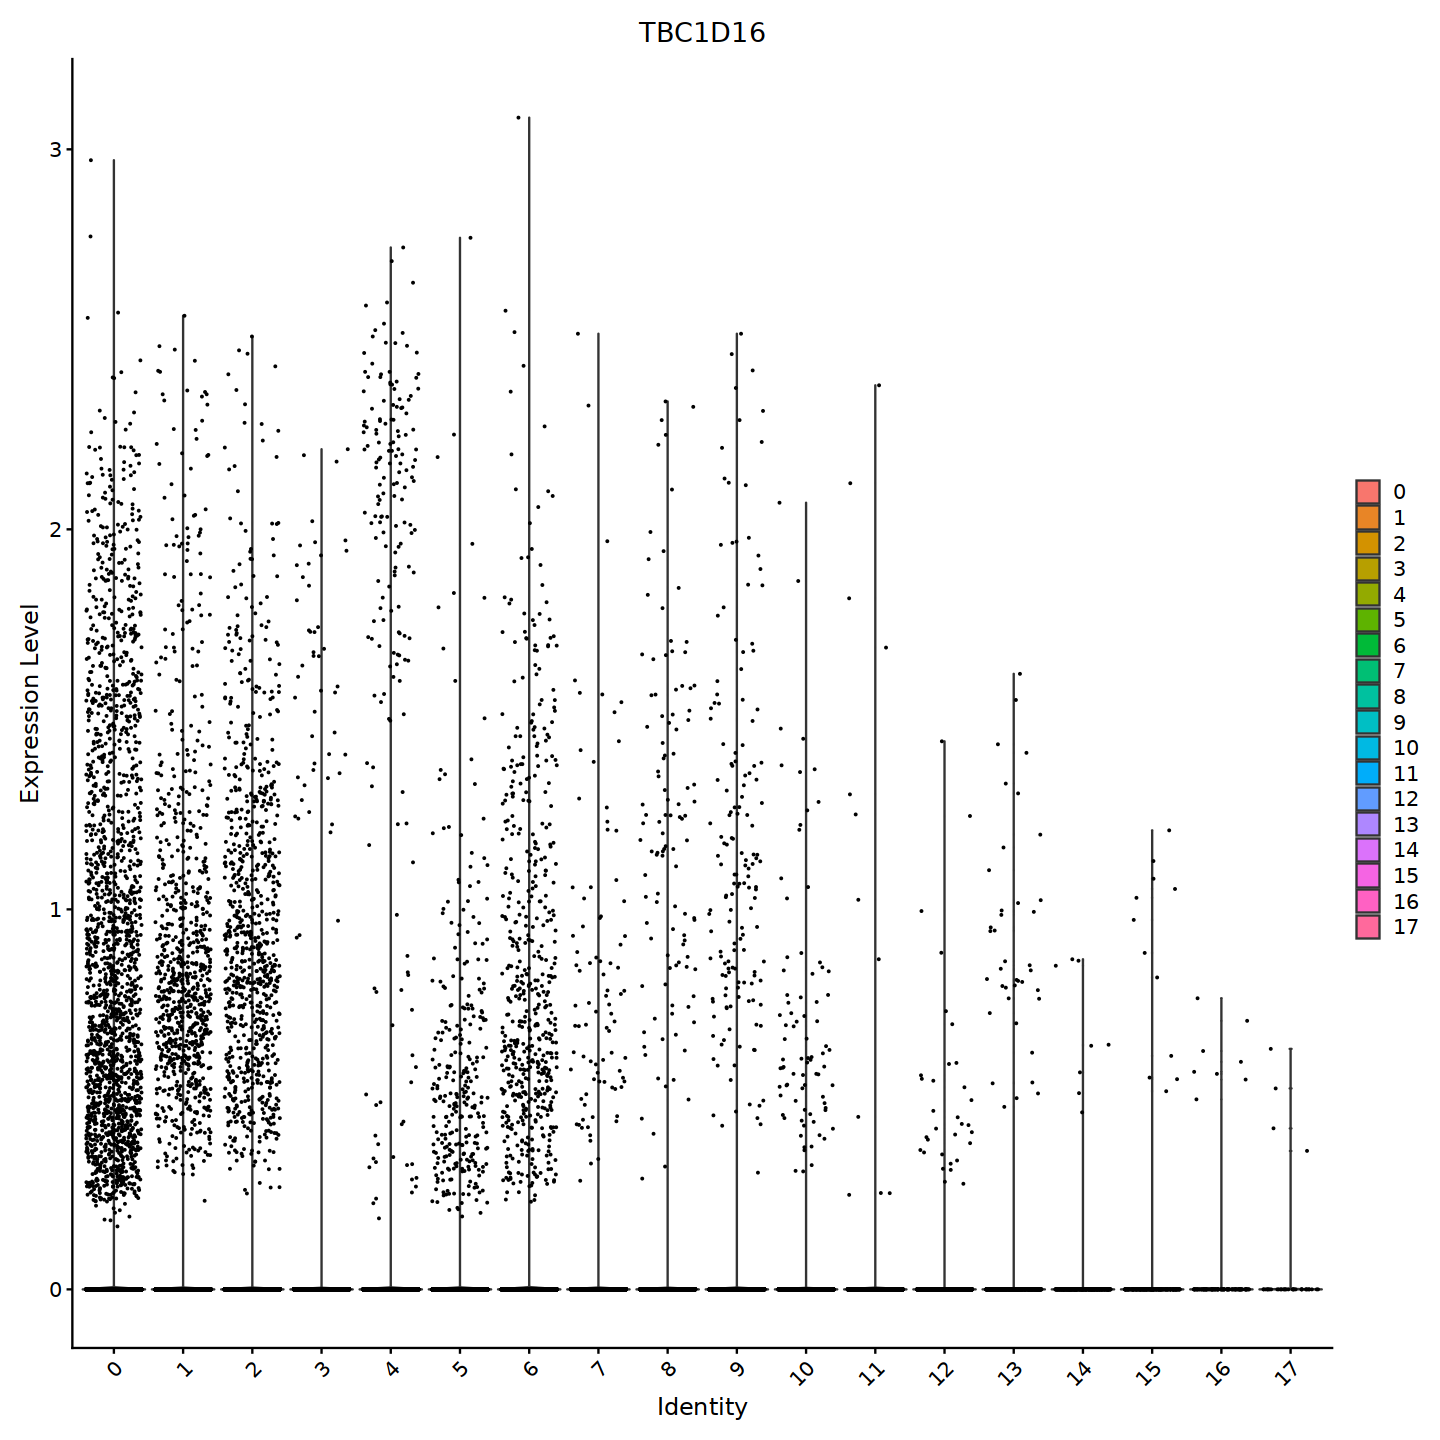

In [152]:
VlnPlot(scRNA_harmony,features = c('TBC1D16'),raster=FALSE)

In [153]:
Idents(scRNA_harmony) = 'group'

In [155]:
DefaultAssay(scRNA_harmony) = 'RNA'

Warning message:
"Scaling data with a low number of groups may produce misleading results"


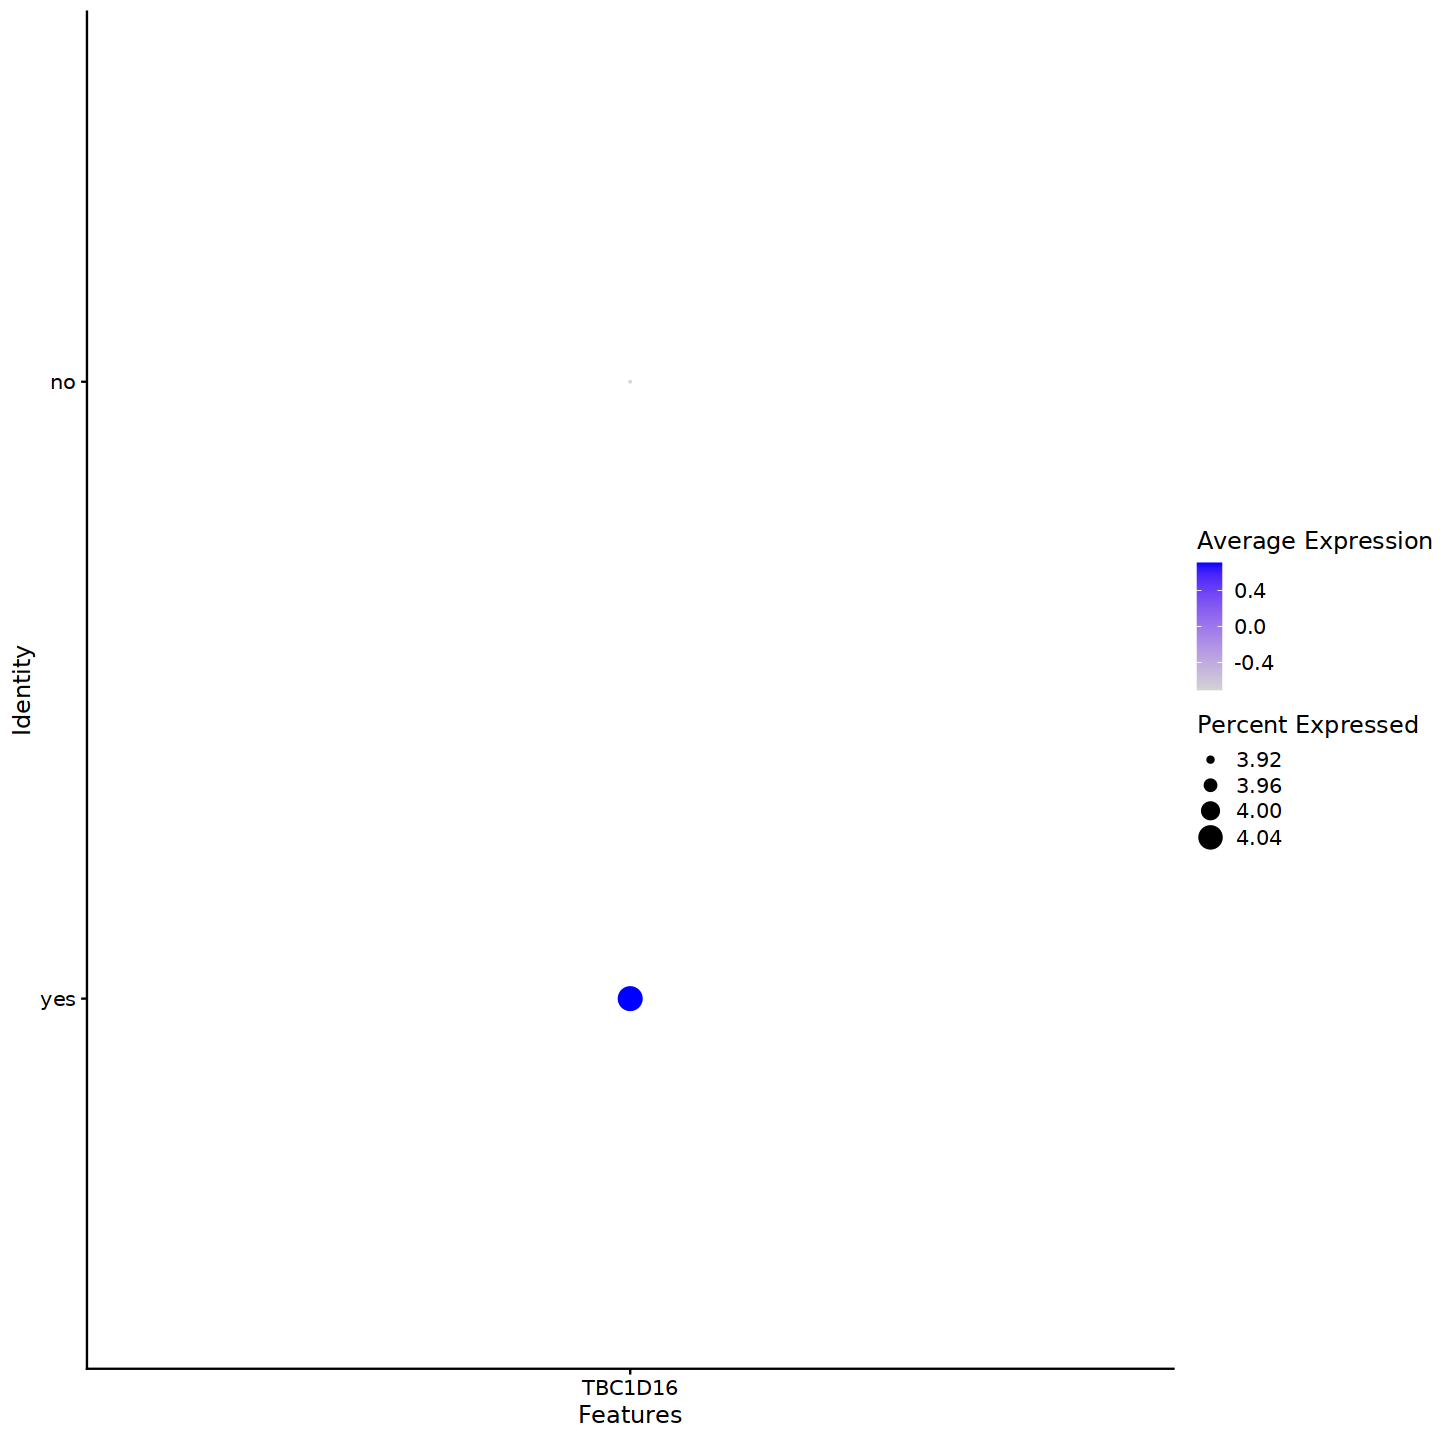

In [156]:
Dotplot(scRNA_harmony,features = c('TBC1D16'))

In [161]:
Idents(scRNA_harmony) = 'seurat_clusters'
DefaultAssay(scRNA_harmony) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA_harmony, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 

library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8

Calculating cluster 9

Calculating cluster 10

Calculating cluster 11

Calculating cluster 12

Calculating cluster 13

Calculating cluster 14

Calculating cluster 15

Calculating cluster 16

Calculating cluster 17



In [162]:
write.csv(sce.markers,file = 'sce.markers.csv')

In [163]:
table(scRNA_harmony$orig.ident,scRNA_harmony$seurat_clusters)

      
          0    1    2    3    4    5    6    7    8    9   10   11   12   13
  BC10 7325  828  802 2111 2798  296 1555  303  400  266   66  113  105   12
  BC11 6109  427 1006  190 2043    0  988  121   48   36   17   14   22    6
  BC16  810 2894  184  447  830  633  404  617  116  185  193   25   87    6
  BC17   29  138   26    1    0   82    1   43    2    1   11    4    5    0
  BC2   146  839  427   78   44  363  108  414  577  816   55   85   88   35
  BC20 3703  617  469   41  682    0  337  208   13  163   29    7    7    1
  BC21  224  422  675 1004   88  774   10  332  234   73   23   52   44    4
  BC22 1827  836  825  769  288    0  148  445  245   61   56   26   12    2
  BC3  1079  865  243   86  411  925  724  161  117   69  138    4  228   32
  BC5  3799 3268 2855  115  916 1273 2633  227 1114  759  290   12   97  276
  BC6  3828 3256 4636  125  478 3144  500  630  519  446  414   27  448  337
  OS_1  282 2524   33  273  218  470  233  573   12   19  343   20   

###  重新读取数据

In [2]:
sce = readRDS('./immune.combined.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
table(sce$orig.ident)


 BC10  BC11  BC16  BC17   BC2  BC20  BC21  BC22   BC3   BC5   BC6  OS_1  OS_2 
16993 11027  7467   343  4103  6277  3975  5681  5139 17651 19018  5055  4402 
 OS_3  OS_4  OS_5  OS_6 
 4595  2423  8467  5994 

In [5]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [34]:
expr <- sce@assays$RNA@data
gene_name <- c("TBC1D16")
gene_expression <- expr %>% 
  .[gene_name,] %>% 
  #t() %>% 
  as.data.frame()

In [35]:


colnames(gene_expression) <- paste0(gene_name)
identical(colnames(sce),row.names(gene_expression))
sce$TBC1D16 <- gene_expression[,paste0(gene_name)]  # CXCL10, 这里需要修改为目标基因
identical(sce@meta.data[,paste0(gene_name)],gene_expression[,paste0(gene_name)])
meta <- sce@meta.data

[1] TRUE

[1] TRUE

In [38]:
table(meta$seurat_clusters,meta$expr)

    
      have    no
  0    569 10413
  1    344  9451
  2    116  9237
  3    701  8605
  4    304  8472
  5     27  7832
  6    410  6380
  7    107  4469
  8    131  2863
  9    168  4183
  10   109  3589
  11    66  3892
  12    26  3815
  13   146  3207
  14   105  3608
  15    75  3479
  16   253  2784
  17   267  2191
  18    22  2734
  19    68  1860
  20   109  1975
  21   109   650
  22   223  1818
  23     5    67
  24    70  1724
  25    55  1492
  26    27   448
  27    57  1286
  28   105  1128
  29    10  1300
  30    45   695
  31    47  1036
  32    41   793
  33    41   763
  34    73   728
  35     4   762
  36    10   666
  37    37   542
  38    28   545
  39     6   545
  40     2   404
  41     6   451
  42     8   274
  43     7   167
  44     0     3
  45    10   116
  46     3    16

In [46]:
Idents(sce) = 'seurat_clusters'

In [48]:
c3 = subset(sce,idents = 3)

In [61]:
table(c3$expr)


have   no 
 701 8605 

In [50]:
c3@meta.data$expr = ifelse(c3@meta.data$TBC1D16 > 0 ,'have','no')

In [51]:
library(Seurat)

In [52]:
Idents(c3) = 'expr'

In [53]:
DefaultAssay(c3) = 'RNA'

In [54]:
library(presto)

In [55]:
gene = wilcoxauc(c3,'expr')

In [56]:
gene1 = gene %>% dplyr::filter(group == 'have' )

In [57]:
gene2 = gene1 %>% filter(grepl('CYP', feature))

In [58]:
write.csv(gene2,file = 'gene2.csv')

In [488]:
immune.combined = scRNA_harmony

In [66]:
saveRDS(immune.combined,file = 'before_rename.rds')

In [489]:
ggsave('figure3.pdf',height =  4,width = 5)

In [490]:
ggsave('figure4.pdf',height =  8,width = 12)

In [2]:
immune.combined = readRDS('before_rename.rds')

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)



In [3]:
scRNA = immune.combined

In [4]:
library(Seurat) ##
library(SingleR)
library(ggplot2)
library(reshape2)
mouseImmu  = get(load('/import/DB/SingleR_ref/ref_Human_all.RData'))

Warning message:
"package 'Seurat' was built under R version 4.2.3"
Attaching SeuratObject

Warning message:
"package 'SingleR' was built under R version 4.2.3"
Loading required package: SummarizedExperiment

Warning message:
"package 'SummarizedExperiment' was built under R version 4.2.2"
Loading required package: MatrixGenerics

Loading required package: matrixStats

Warning message:
"package 'matrixStats' was built under R version 4.2.3"

Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,

In [5]:
pbmc_for_SingleR <- GetAssayData(scRNA, slot="data") ##获取标准化矩阵
clusters=scRNA@meta.data$seurat_clusters

In [6]:
pred.mouseImmu <- SingleR(test = pbmc_for_SingleR, ref = mouseImmu, labels = mouseImmu$label.main,
 method = "cluster", clusters = clusters, 
 assay.type.test = "logcounts", assay.type.ref = "logcounts")
celltype = data.frame(ClusterID=rownames(pred.mouseImmu), celltype=pred.mouseImmu$labels, stringsAsFactors = FALSE)

Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message:
"useNames =

In [7]:
celltype$celltype = c('T/NK','Mesenchyme/osteoclast',
                      'Myeloid','Mesenchyme/osteoclast','Myeloid',
                      'Neutrophils','T/NK',
                      'Endo','Mesenchyme/osteoclast',
                      'T/NK','B',
                      'Mesenchyme/osteoclast','Neutrophils',
                      'B','B',
                      'B','Mast',
                      'Myeloid','Mesenchyme/osteoclast',
                      'Mesenchyme/osteoclast','Neutrophils')

In [8]:
scRNA@meta.data$celltype = "NA"
# 赋值
for(i in 1:nrow(celltype)){
  scRNA@meta.data[which(scRNA@meta.data$seurat_clusters == celltype$ClusterID[i]),'celltype'] <- celltype$celltype[i]}

In [83]:
Idents(scRNA) = 'seurat_clusters'

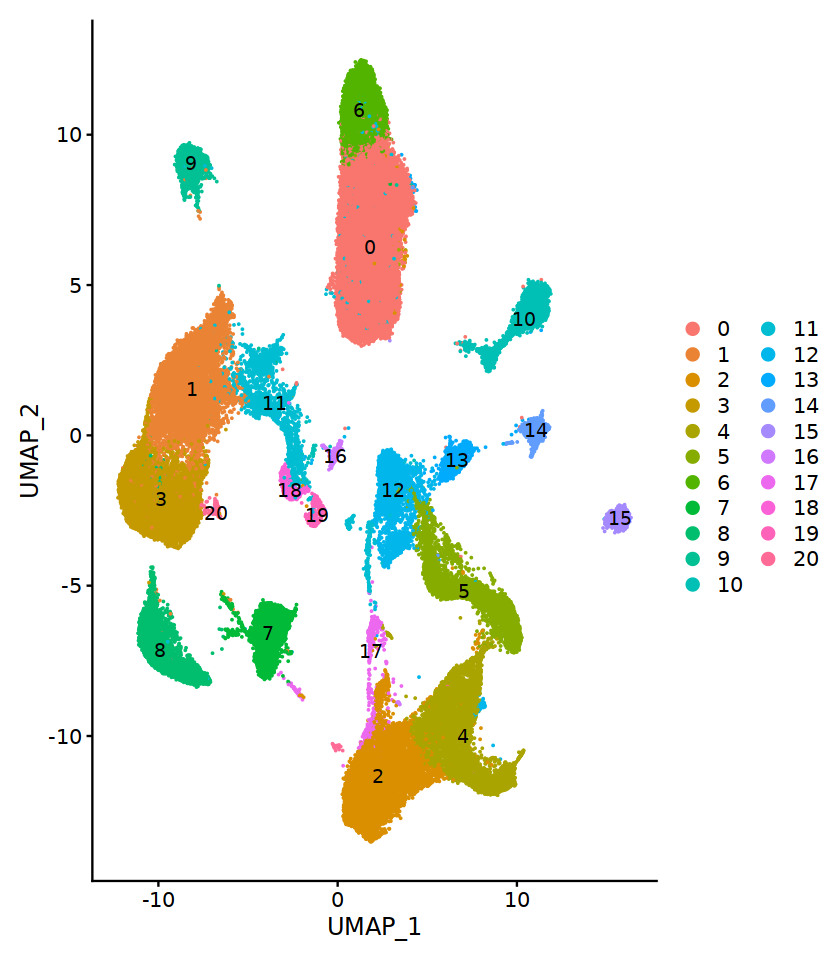

In [88]:
DimPlot(immune.combined, reduction = "umap", label=T) 


In [11]:
library(Seurat)

In [12]:
options(repr.plot.width = 8,repr.plot.height = 5)

In [13]:
table(scRNA$seurat_clusters)


    0     1     2     3     4     5     6     7     8     9    10    11    12 
22919  9047  8252  6586  5749  5549  5311  3952  3437  3109  2734  2637  2550 
   13    14    15    16    17    18    19    20 
 1678   993   959   541   537   470   345   142 

In [76]:
DefaultAssay(scRNA) = 'RNA'

FeaturePlot(scRNA,features =  '')

Warning message in FetchData.Seurat(object = object, vars = c(dims, "ident", features), :
"The following requested variables were not found: CSTK"


ERROR: Error: None of the requested features were found: CSTK in slot data


In [15]:
table(scRNA$celltype,scRNA$seurat_clusters)

                       
                            0     1     2     3     4     5     6     7     8
  B                         0     0     0     0     0     0     0     0     0
  Endo                      0     0     0     0     0     0     0  3952     0
  Mast                      0     0     0     0     0     0     0     0     0
  Mesenchyme/osteoclast     0  9047     0  6586     0     0     0     0  3437
  Myeloid                   0     0  8252     0  5749     0     0     0     0
  Neutrophils               0     0     0     0     0  5549     0     0     0
  T/NK                  22919     0     0     0     0     0  5311     0     0
                       
                            9    10    11    12    13    14    15    16    17
  B                         0  2734     0     0  1678   993   959     0     0
  Endo                      0     0     0     0     0     0     0     0     0
  Mast                      0     0     0     0     0     0     0   541     0
  Mesenchyme/ost

In [16]:
data = scRNA@meta.data 

In [17]:
data$barcode = rownames(data)

In [18]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, setdiff, union


The following object is masked from 'package:matrixStats':

    count


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [19]:
part1 = data %>% dplyr::filter(orig.ident == 'GSE196678')

In [20]:
part2 = data %>% dplyr::filter(orig.ident != 'GSE196678')

In [21]:
library("stringr")  
anno2 = part1 %>%  mutate(
    sample = case_when(
        str_sub(barcode, - 4, - 1) == '-1_1' ~'C1',
        str_sub(barcode, - 4, - 1) == '-2_1' ~'C2',
        str_sub(barcode, - 4, - 1) == '-3_1' ~'C3',
        str_sub(barcode, - 4, - 1) == '-4_1' ~'C4',
        .default = orig.ident

    )
  )

Warning message:
"package 'stringr' was built under R version 4.2.3"


In [22]:
part2$sample = part2$orig.ident

In [23]:
anno3  = rbind(part2,anno2)

In [24]:
scRNA@meta.data = anno3

In [25]:
scRNA$orig.ident = scRNA$sample

In [26]:
table(scRNA$orig.ident)


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 

In [27]:
saveRDS(scRNA,file = 'scRNA.rename.rds')

In [79]:
Idents(scRNA) = 'celltype'
DefaultAssay(scRNA) = 'RNA'
sce.markers <- FindAllMarkers(object = scRNA, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)
 



Calculating cluster B

Calculating cluster Mesenchyme/osteoclast

Calculating cluster Neutrophils

Calculating cluster Myeloid

Calculating cluster T/NK

Calculating cluster Endo

Calculating cluster Mast



In [80]:
library(dplyr) 
# 不同seurat版本的 avg_logFC 不一样 
top5 <- sce.markers %>% group_by(cluster) %>% top_n(5, avg_log2FC)

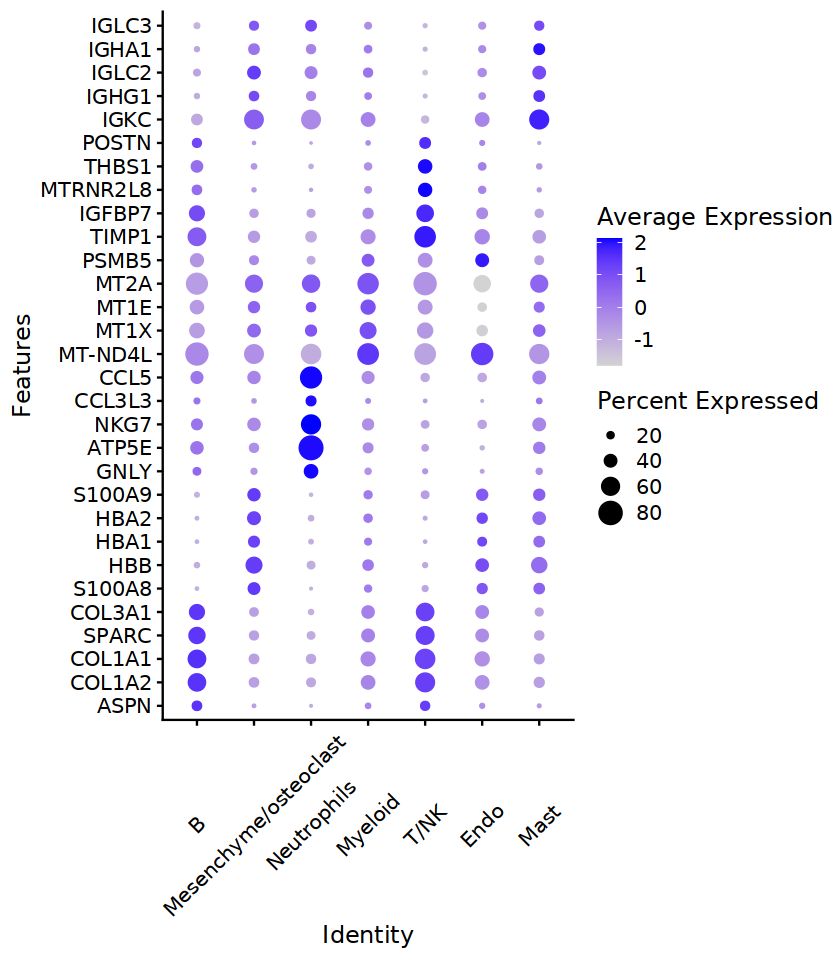

In [81]:
options(repr.plot.height = 8,repr.plot.width = 7)

 DotPlot(scRNA, features = unique(top5$gene) ,
 assay='RNA' ) + coord_flip()+ theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [31]:
scedata = scRNA

In [32]:
scedata$orig.ident = scedata$sample

In [33]:
Idents(scedata) = 'celltype'

In [34]:
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 


                    B Mesenchyme/osteoclast           Neutrophils 
          0.072733922           0.257403111           0.094186086 
              Myeloid                  T/NK                  Endo 
          0.166154268           0.358172280           0.045167263 
                 Mast 
          0.006183069 

                       
                          C1   C2   C3   C4   S1   S2   S3   S4 WH2109002886
  B                       34   29   15  267  640 1421  618  257          348
  Mesenchyme/osteoclast 4063 4292 3634 1519  179  279  100   72          246
  Neutrophils             55   64   20  712    7   21    4    9            6
  Myeloid               1368 1341 1158 4171  336  477   99   49          195
  T/NK                   513  414  675  770 2450 4281 1628 4300         9042
  Endo                   289  527 2031  304   30   45   12   64          168
  Mast                    87   79   78   31    2   10    4    1            2
                       
                        WH2109013167 WH2112008442 WH2201006389 WH2203005877
  B                             1027         1109          472          127
  Mesenchyme/osteoclast          494         1232         2952         3460
  Neutrophils                   1532         4487         1300           24
  Myeloid                       

In [35]:
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- data.frame(Cellratio)

In [36]:
library(reshape2)
cellper <- dcast(Cellratio,Var2~Var1, value.var = "Freq")#长数据转为宽数据
rownames(cellper) <- cellper[,1]
cellper <- cellper[,-1]

In [37]:
sample <- rownames(cellper)

In [38]:
sample

[1] "C1"           "C2"           "C3"           "C4"           "S1"          
 [6] "S2"           "S3"           "S4"           "WH2109002886" "WH2109013167"
[11] "WH2112008442" "WH2201006389" "WH2203005877"

In [39]:
group <- c(rep('Con',8),rep('OS',5))


samples <- data.frame(sample, group)#创建数据框

rownames(samples)=samples$sample
cellper$sample <- samples[rownames(cellper),'sample']#R添加列
cellper$group <- samples[rownames(cellper),'group']#R添加列

###作图展示
pplist = list()
sce_groups = unique(scRNA$celltype)


In [40]:
library(ggplot2)
library(dplyr)
library(ggpubr)
library(cowplot)
for(group_ in sce_groups){
  cellper_  = cellper %>% select(one_of(c('sample','group',group_)))#选择一组数据
  colnames(cellper_) = c('sample','group','percent')#对选择数据列命名
  cellper_$percent = as.numeric(cellper_$percent)#数值型数据
  cellper_ <- cellper_ %>% group_by(group) %>% mutate(upper =  quantile(percent, 0.75), 
                                                      lower = quantile(percent, 0.25),
                                                      mean = mean(percent),
                                                      median = median(percent))#上下分位数
# print(group_)
print(cellper_$median)
      pp1 = ggplot(cellper_,aes(x=group,y=percent)) + #ggplot作图
    geom_jitter(shape = 21,aes(fill=group),width = 0.25) + 
    stat_summary(fun=mean, geom="point", color="grey60") +
    theme_cowplot() +
    theme(axis.text = element_text(size = 10),axis.title = element_text(size = 10),legend.text = element_text(size = 10),
          legend.title = element_text(size = 10),plot.title = element_text(size = 10,face = 'plain'),legend.position = 'none') + 
    labs(title = group_,y='Percentage') +
    geom_errorbar(aes(ymin = lower, ymax = upper),col = "grey60",width =  1)
  
  ###组间t检验分析
  labely = max(cellper_$percent)
  compare_means(percent ~ group,  data = cellper_)
  my_comparisons <- list( c("Con", "OS") )
  pp1 = pp1 + stat_compare_means(comparisons = my_comparisons,size = 3,method = "t.test")
  pplist[[group_]] = pp1
}
  

Warning message:
"package 'ggpubr' was built under R version 4.2.3"
Warning message:
"package 'cowplot' was built under R version 4.2.3"

Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend




 [1] 0.04421387 0.04421387 0.04421387 0.04421387 0.04421387 0.04421387
 [7] 0.04421387 0.04421387 0.04981530 0.04981530 0.04981530 0.04981530
[13] 0.04981530
 [1] 0.1222584 0.1222584 0.1222584 0.1222584 0.1222584 0.1222584 0.1222584
 [8] 0.1222584 0.1225871 0.1225871 0.1225871 0.1225871 0.1225871
 [1] 0.002920867 0.002920867 0.002920867 0.002920867 0.002920867 0.002920867
 [7] 0.002920867 0.002920867 0.137203166 0.137203166 0.137203166 0.137203166
[13] 0.137203166
 [1] 0.12217729 0.12217729 0.12217729 0.12217729 0.12217729 0.12217729
 [7] 0.12217729 0.12217729 0.07283582 0.07283582 0.07283582 0.07283582
[13] 0.07283582
 [1] 0.3771182 0.3771182 0.3771182 0.3771182 0.3771182 0.3771182 0.3771182
 [8] 0.3771182 0.2469657 0.2469657 0.2469657 0.2469657 0.2469657
 [1] 0.02628636 0.02628636 0.02628636 0.02628636 0.02628636 0.02628636
 [7] 0.02628636 0.02628636 0.01323383 0.01323383 0.01323383 0.01323383
[13] 0.01323383
 [1] 0.002805185 0.002805185 0.002805185 0.002805185 0.002805185 0.00280518

In [41]:
options(repr.plot.height = 8,repr.plot.width = 9)

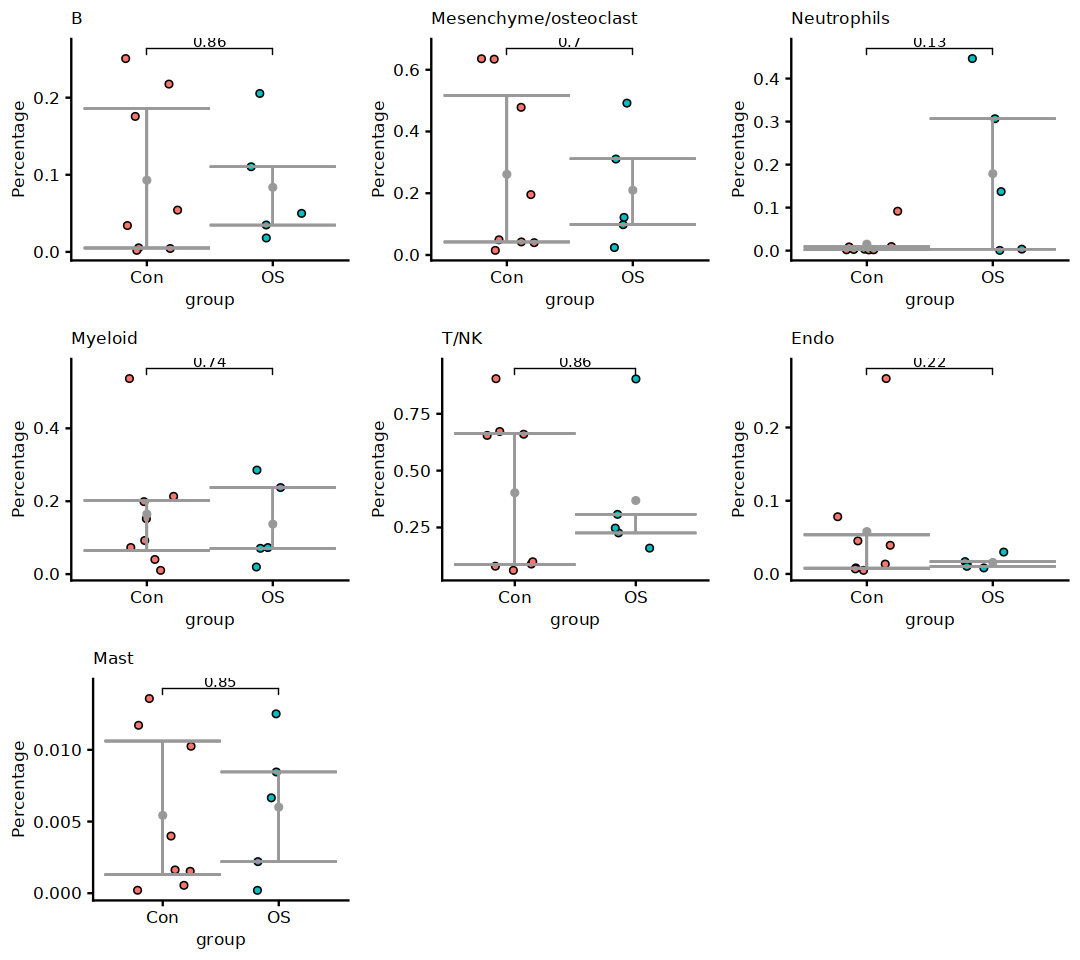

In [42]:
 library(cowplot)
plot_grid(pplist[[1]],
          pplist[[2]],
          pplist[[3]],
          pplist[[4]],
          pplist[[5]],
          pplist[[6]],
          pplist[[7]])


          C1           C2           C3           C4           S1           S2 
        6409         6746         7611         7774         3644         6534 
          S3           S4 WH2109002886 WH2109013167 WH2112008442 WH2201006389 
        2465         4752        10007         4997        10050         9475 
WH2203005877 
        7033 


                    B Mesenchyme/osteoclast           Neutrophils 
          0.072733922           0.257403111           0.094186086 
              Myeloid                  T/NK                  Endo 
          0.166154268           0.358172280           0.045167263 
                 Mast 
          0.006183069 

                       
                           OS control
  B                       644    5720
  Mesenchyme/osteoclast 19473    3049
  Neutrophils             913    7328
  Myeloid               12136    2402
  T/NK                   4577   26762
  Endo                   3428     524
  Mast                    391     150

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."
Warning message:
"package 'ggalluvial' was built under R version 4.2.3"


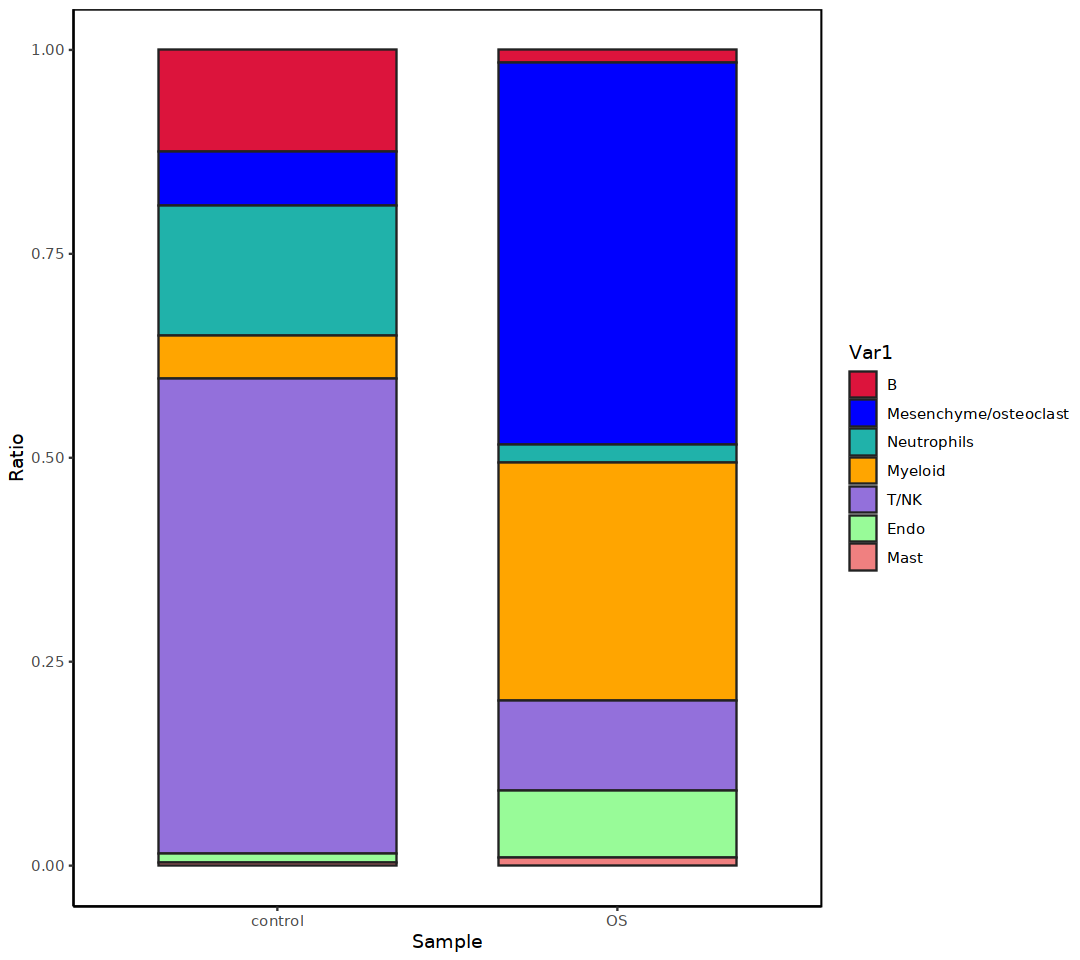

In [43]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$group)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$group), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('control','OS'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

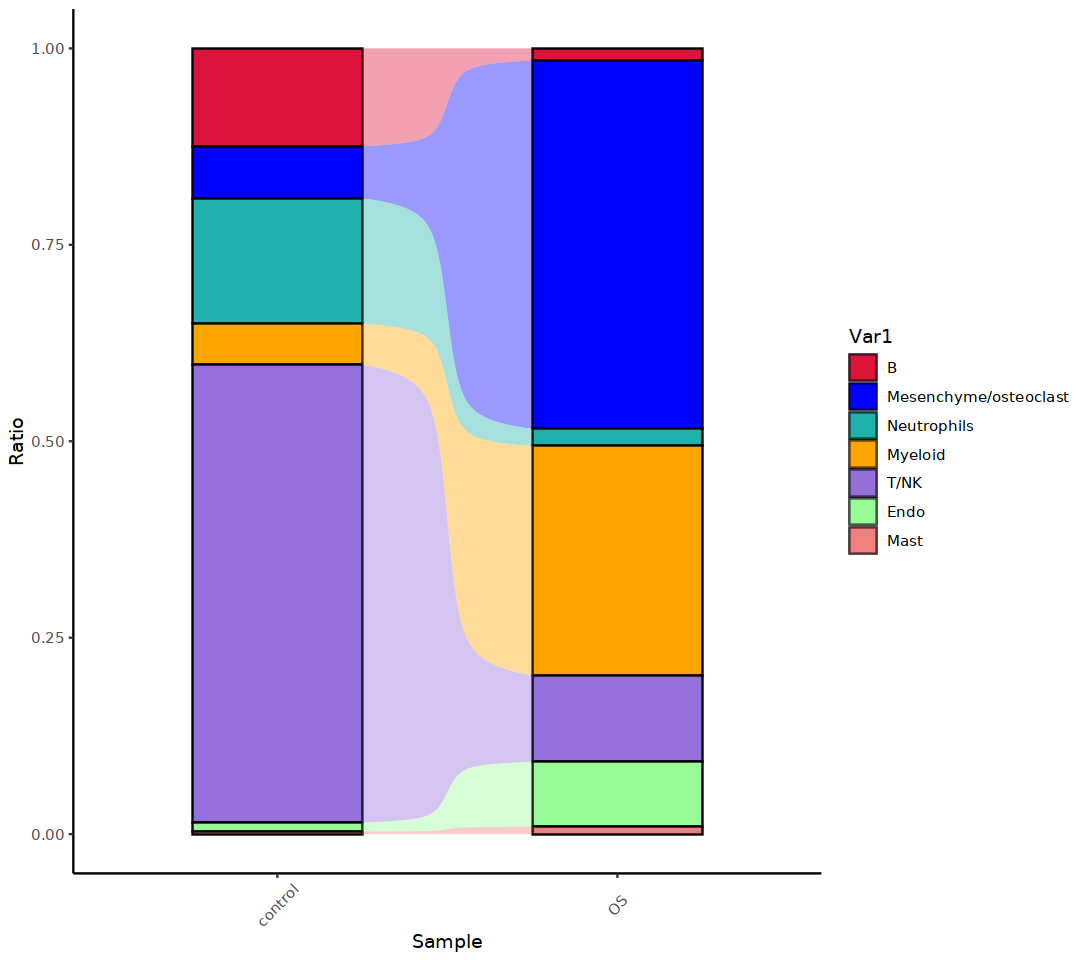

In [44]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))

In [45]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(scran)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Warning message:
"package 'edgeR' was built under R version 4.2.3"
Loading required package: limma

Warning message:
"package 'limma' was built under R version 4.2.3"

Attaching package: 'limma'


The following object is masked from 'package:BiocGenerics':

    plotMA


Warning message:
"package 'SingleCellExperiment' was built under R version 4.2.2"

Attaching package: 'SingleCellExperiment'


The following object is masked from 'package:edgeR':

    cpm


Loading required package: scuttle


Attaching package: 'scater'


The following object is masked from 'package:limma':

    plotMDS


Warning message:
"package 'patchwork' was built under R version 4.2.3"

Attaching package: 'patchwork'


The following object is masked from 'package:cowplot':

    align_plots




Warning message in .check_reddim_names(x, value, withDimnames):
"non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value, withDimnames):
"non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor."
Warning message in .check_reddim_names(x, value, withDimnames):
"non-NULL 'rownames(value)' should be the same as 'colnames(x)' for
'reducedDim<-'. This will be an error in the next release of
Bioconductor."


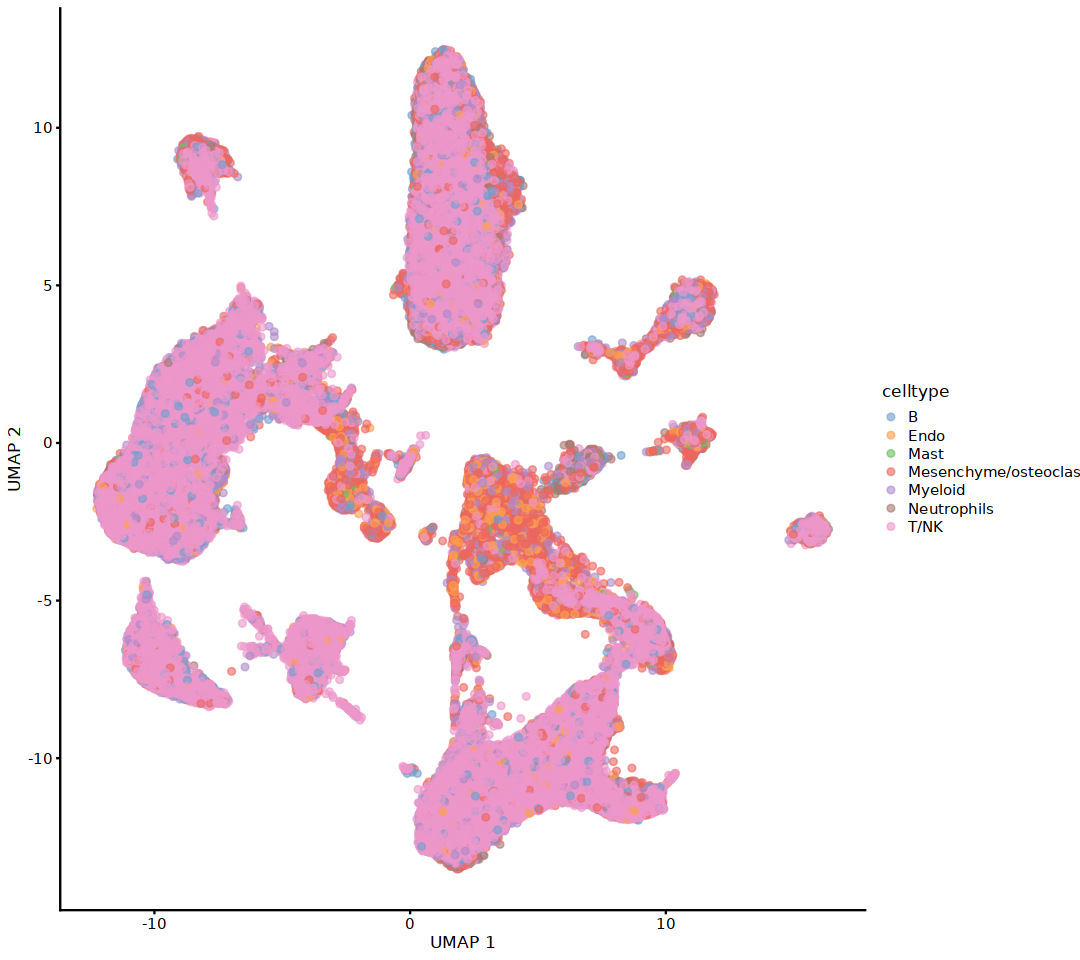

In [46]:
sce <- as.SingleCellExperiment(scedata)
 
#Visualize the data
plotReducedDim(sce, colour_by="celltype", dimred = "UMAP") 

Constructing kNN graph with k:20

Checking valid object

Running refined sampling with reduced_dim

Checking meta.data validity

Counting cells in neighbourhoods

  [[ suppressing 13 column names 'S1', 'S2', 'S3' ... ]]



6 x 13 sparse Matrix of class "dgCMatrix"
                                 
1 . . . 45 24  .  . . . . .  .  .
2 . . .  .  .  .  . . . . 5 30  5
3 . . .  .  .  .  . . . . 1  . 41
4 . . .  . 89 22  . . . . .  .  .
5 . . .  .  .  4 32 . . . .  .  .
6 . . .  .  .  2 17 4 . . .  .  .

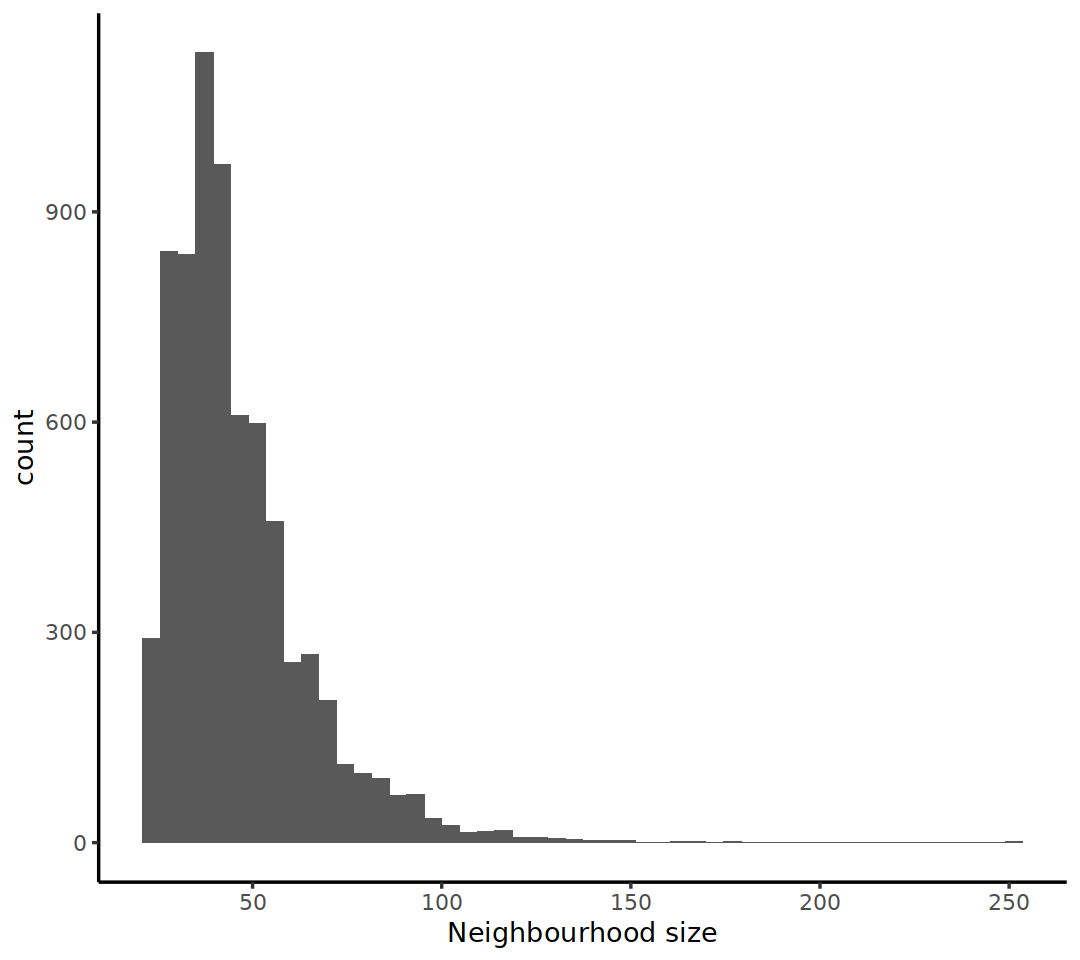

In [47]:
scmilo <- Milo(sce)
 
#Construct KNN graph
scmilo <- buildGraph(scmilo, k = 20, d = 20,reduced.dim = "PCA")
 
#Defining representative neighbourhoods on the KNN graph
set.seed(10)
scmilo <- makeNhoods(scmilo, prop = 0.1,
                     k = 20, d = 20, 
                     refined = TRUE, reduced_dims = "PCA")
plotNhoodSizeHist(scmilo)
 
#Counting cells in neighbourhoods
scmilo <- countCells(scmilo, 
                     meta.data = as.data.frame(colData(scmilo)), 
                     sample = "sample")
head(nhoodCounts(scmilo))

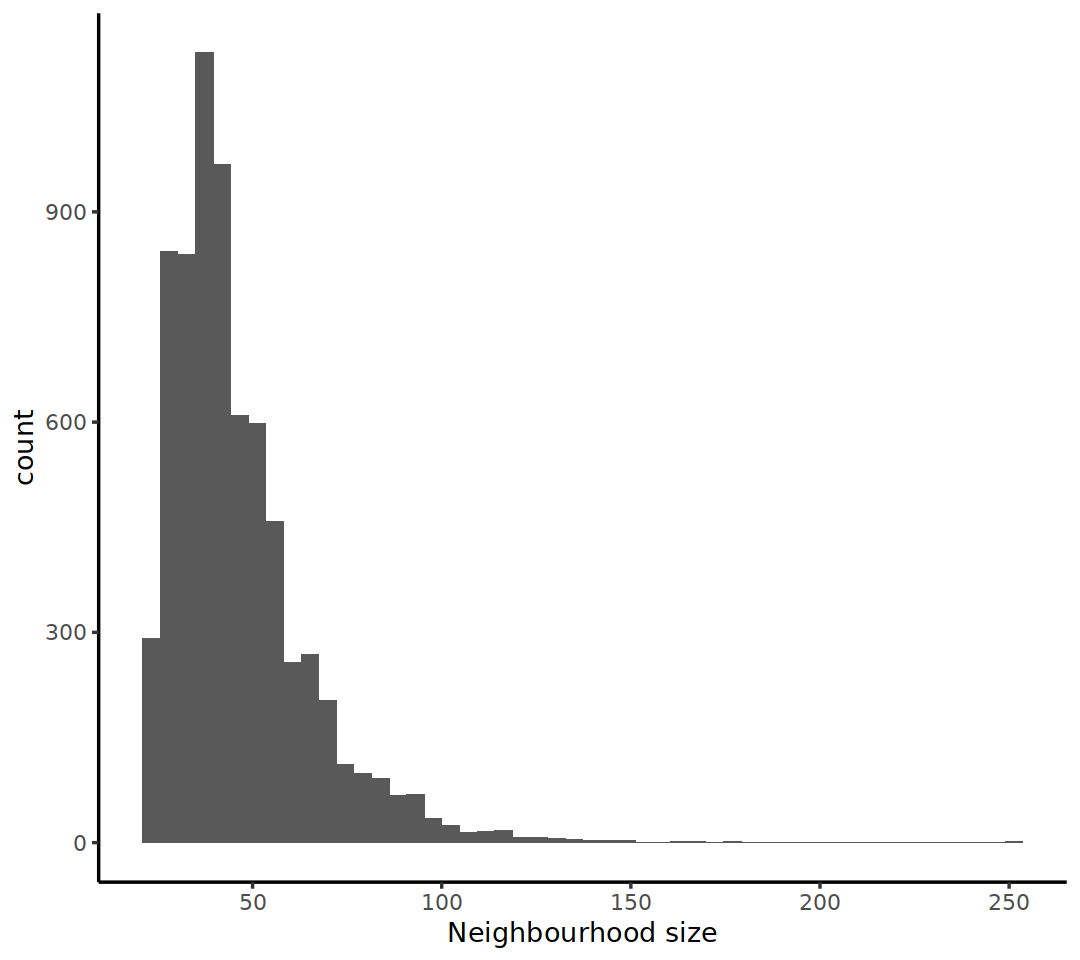

In [48]:
plotNhoodSizeHist(scmilo)

In [49]:
sc_design <- data.frame(colData(scmilo))[,c("sample", "group")]

In [50]:
sc_design <- distinct(sc_design)
rownames(sc_design) <- sc_design$sample

In [51]:
sc_design <- sc_design[colnames(nhoodCounts(scmilo)), , drop=FALSE]
table(sc_design$group)


     OS control 
      5       8 

In [52]:

#odDistance(scmilo, d = 20, reduced.dim = "PCA")

In [53]:
rownames(sc_design) <- sc_design$sample

In [54]:
sc_design$control = c(rep(1,4),rep(0,5),rep(1,4))
sc_design$OS = c(rep(0,4),rep(1,5),rep(0,4))

In [55]:
sc_design$control  = as.factor(sc_design$control )

In [56]:
sc_design$OS = as.factor(sc_design$OS )

In [57]:
model <- model.matrix(~ 0+group, data=sc_design)

In [58]:
model

,groupOS,groupcontrol
S1,0,1
S2,0,1
S3,0,1
S4,0,1
WH2109002886,1,0
WH2109013167,1,0
WH2112008442,1,0
WH2201006389,1,0
WH2203005877,1,0
C1,0,1


In [59]:
contrast.1 <- c("groupOS -  groupcontrol") # the syntax is <VariableName><ConditionLevel> - <VariableName><ControlLevel>

Using TMM normalisation

Performing spatial FDR correction withgraph-overlap weighting



ERROR: Error in eval(quote(list(...)), env): object 'da_results' not found


In [60]:
# we need to use the ~ 0 + Variable expression here so that we have all of the levels of our variable as separate columns in our model matrix
results <- testNhoods(scmilo, design = ~0 + group, design.df = sc_design, model.contrasts = contrast.1,
                         fdr.weighting="graph-overlap", norm.method="TMM")
table(results$SpatialFDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withgraph-overlap weighting




FALSE  TRUE 
 4377  2667 

In [61]:
results %>%
  arrange(SpatialFDR) %>%
  head() 

,logFC,logCPM,F,PValue,FDR,Nhood,SpatialFDR
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,7.792245,8.822146,11.28191,0.0007830355,0.00838214,4,0.007036483
5,6.344599,7.717365,10.61947,0.0011195147,0.00838214,5,0.007036483
6,5.684600,7.312376,13.75823,0.0002080527,0.00838214,6,0.007036483
14,7.922163,8.932298,11.52155,0.0006882864,0.00838214,14,0.007036483
15,6.141133,7.588478,11.35160,0.0007541979,0.00838214,15,0.007036483
16,8.650010,9.572194,12.55078,0.0003962728,0.00838214,16,0.007036483


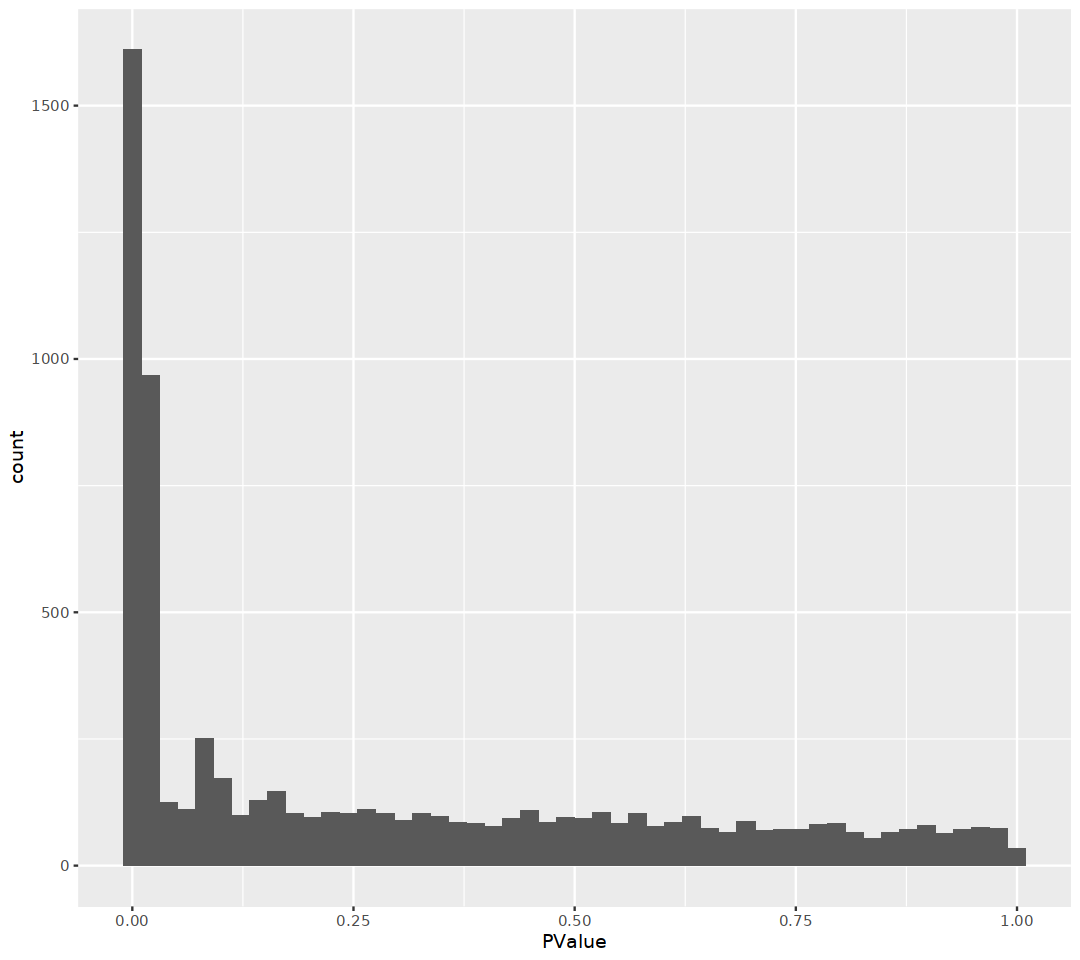

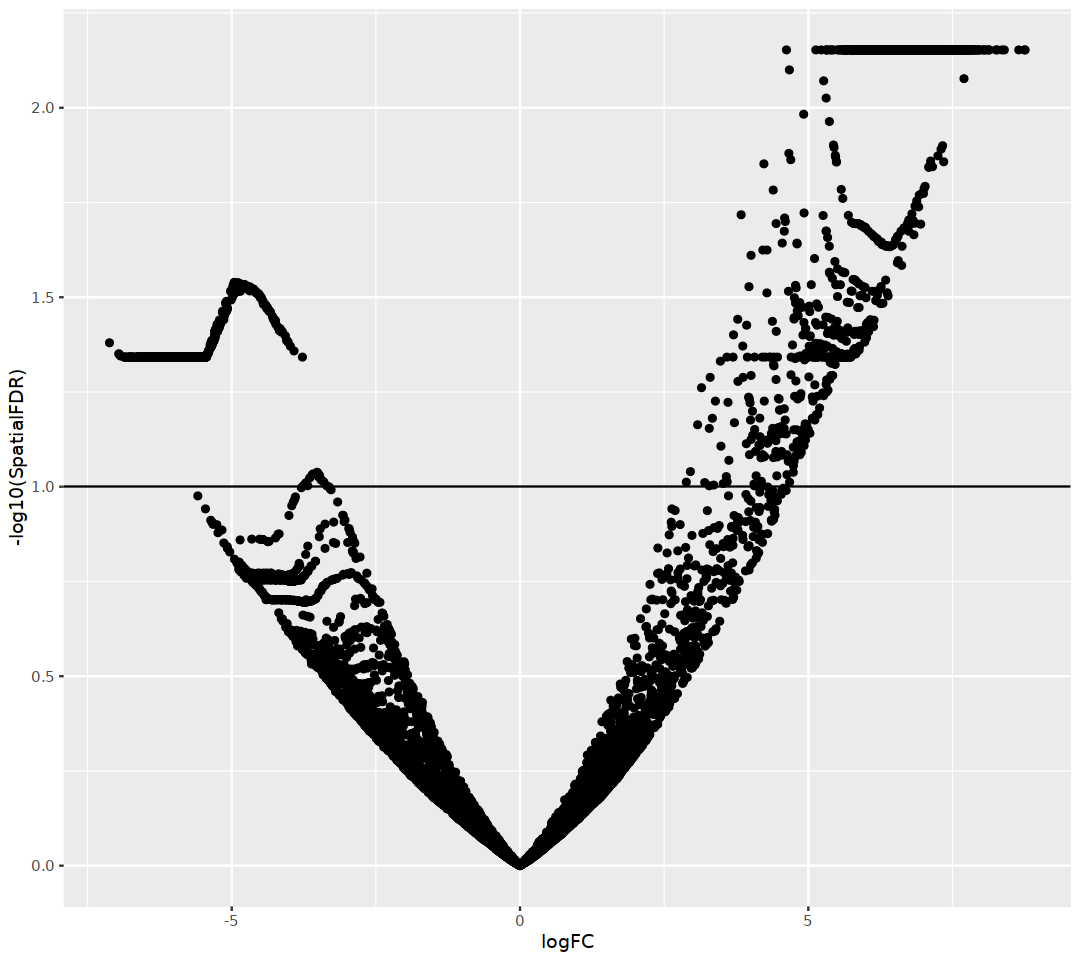

In [62]:
ggplot(results, aes(PValue)) + geom_histogram(bins=50)
ggplot(results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) 

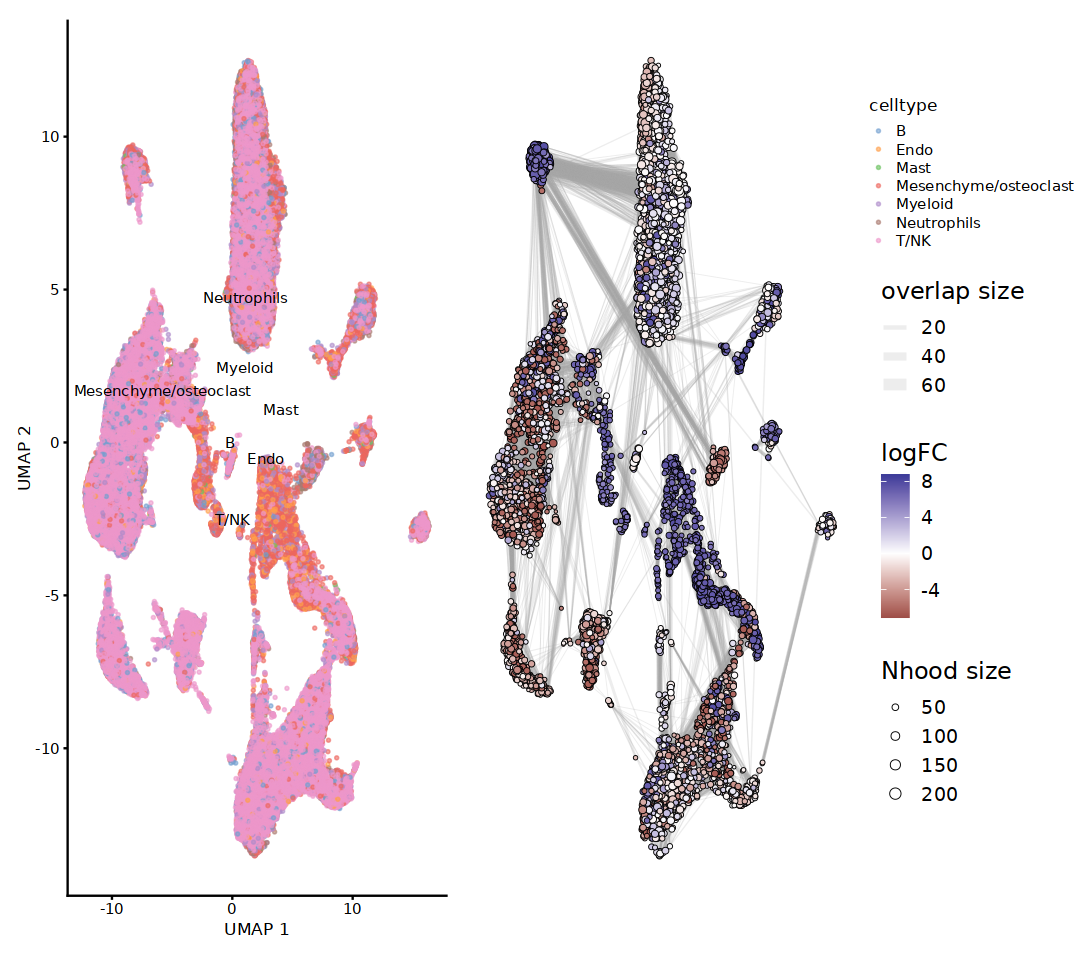

In [63]:
scmilo <- buildNhoodGraph(scmilo)
 
## Plot single-cell UMAP
umap_pl <- plotReducedDim(scmilo, dimred = "UMAP", 
                          colour_by="celltype", text_by = "celltype", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none")
 
## Plot neighbourhood graph
nh_graph_pl <- plotNhoodGraphDA(scmilo, results, layout="UMAP",alpha = 1) 
 
umap_pl + nh_graph_pl +
  plot_layout(guides="collect")

In [64]:
results <- annotateNhoods(scmilo, results, coldata_col = "celltype")

Converting celltype to factor...



In [65]:
table(results$celltype)


                    B                  Endo Mesenchyme/osteoclast 
                    9                     5                  2521 
              Myeloid           Neutrophils                  T/NK 
                  565                  1008                  2936 

In [66]:
# https://rdrr.io/github/MarioniLab/miloR/f/vignettes/milo_contrasts.Rmd

Converting group.by to factor...



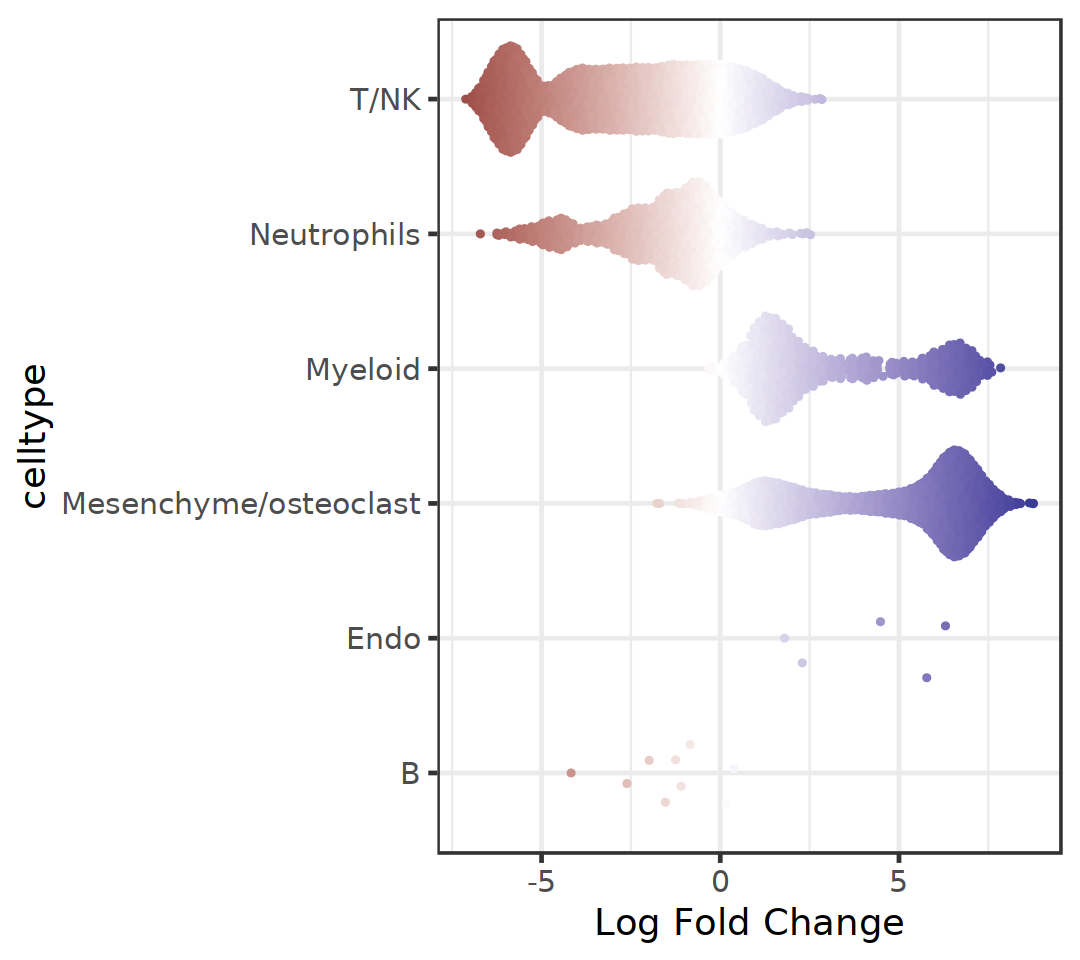

In [67]:
plotDAbeeswarm(results, group.by = "celltype",alpha = 1)

In [89]:
DefaultAssay(scRNA) ='RNA'

In [91]:
Idents(scRNA) = 'celltype'

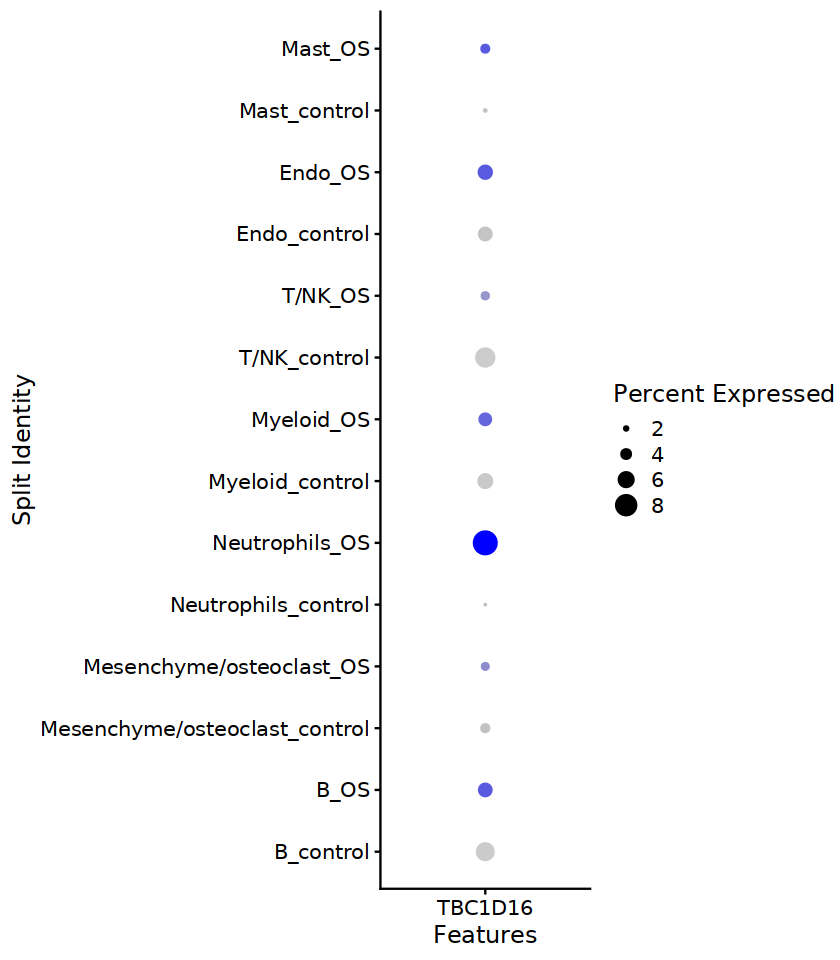

In [97]:
DotPlot(scRNA,features = 'TBC1D16',split.by = 'group')

In [101]:
DefaultAssay(scRNA) = 'RNA'

In [102]:
Idents(scRNA) = 'sample'

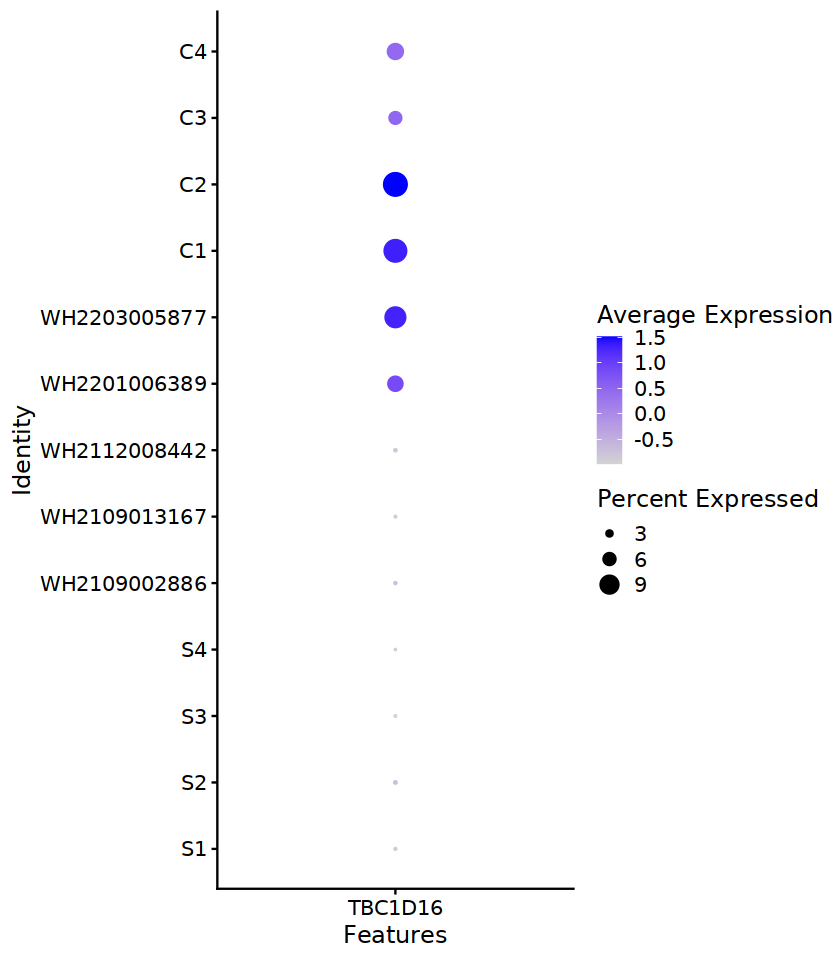

In [103]:
DotPlot(scRNA,features = 'TBC1D16')